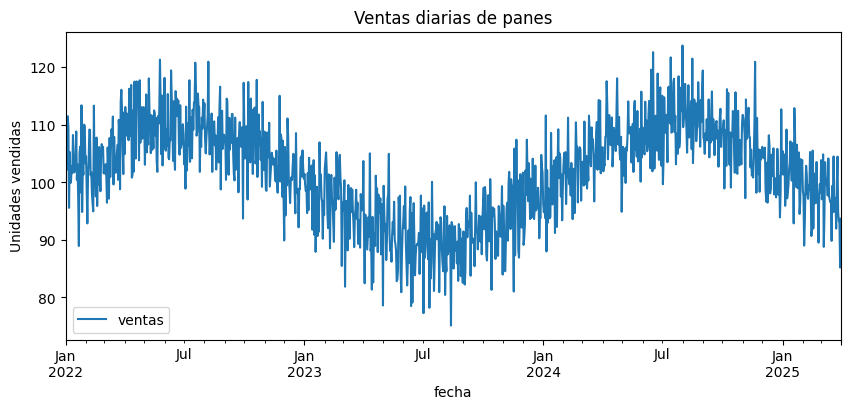

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Crear fechas de ejemplo
fechas = pd.date_range(start="2022-01-01", end="2025-03-31", freq="D")

# Simular ventas diarias con algo de ruido
np.random.seed(0)
ventas = 100 + np.sin(np.linspace(0, 10, len(fechas))) * 10 + np.random.normal(0, 5, len(fechas))

# Crear DataFrame
df = pd.DataFrame({"fecha": fechas, "ventas": ventas})
df["fecha"] = pd.to_datetime(df["fecha"])
df.set_index("fecha", inplace=True)

# Visualizar
df.plot(figsize=(10, 4), title="Ventas diarias de panes")
plt.ylabel("Unidades vendidas")
plt.show()

Predicción diaria para el próximo mes:
2025-04-01    94.056883
2025-04-02    92.004500
2025-04-03    92.272344
2025-04-04    91.767410
2025-04-05    91.295832
2025-04-06    92.527201
2025-04-07    92.311089
2025-04-08    92.011815
2025-04-09    92.095423
2025-04-10    91.992910
2025-04-11    92.011959
2025-04-12    92.165263
2025-04-13    92.095723
2025-04-14    92.063263
2025-04-15    92.078921
2025-04-16    92.064033
2025-04-17    92.076853
2025-04-18    92.092187
2025-04-19    92.078093
2025-04-20    92.076136
2025-04-21    92.078519
2025-04-22    92.076781
2025-04-23    92.079542
2025-04-24    92.080470
2025-04-25    92.078196
2025-04-26    92.078394
2025-04-27    92.078699
2025-04-28    92.078540
2025-04-29    92.078979
2025-04-30    92.078917
Freq: D, Name: predicted_mean, dtype: float64

🔮 Total estimado para el próximo mes: 2763.92 panes


/Users/giampieermariscal/Downloads/py_2/.venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/giampieermariscal/Downloads/py_2/.venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/giampieermariscal/Downloads/py_2/.venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


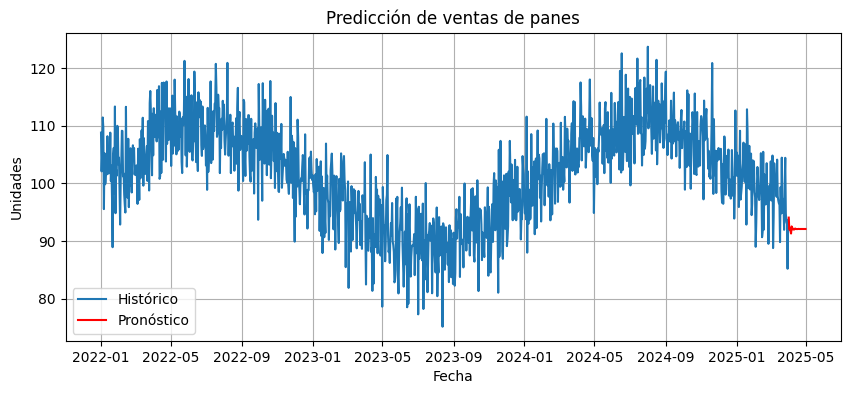

In [4]:
from statsmodels.tsa.arima.model import ARIMA

# Entrenar el modelo ARIMA(p,d,q). Usamos (5,1,0) como punto de partida
modelo = ARIMA(df["ventas"], order=(5, 1, 0))
modelo_fit = modelo.fit()

# Predecir los próximos 30 días
forecast = modelo_fit.forecast(steps=30)

# Mostrar resultados
print("Predicción diaria para el próximo mes:")
print(forecast)

# Sumar total del próximo mes
total_mes_siguiente = forecast.sum()
print(f"\n🔮 Total estimado para el próximo mes: {total_mes_siguiente:.2f} panes")

# Visualizar
plt.figure(figsize=(10, 4))
plt.plot(df.index, df["ventas"], label="Histórico")
plt.plot(pd.date_range(df.index[-1] + pd.Timedelta(days=1), periods=30), forecast, label="Pronóstico", color="red")
plt.title("Predicción de ventas de panes")
plt.ylabel("Unidades")
plt.xlabel("Fecha")
plt.legend()
plt.grid(True)
plt.show()

13:04:21 - cmdstanpy - INFO - Chain [1] start processing
13:04:21 - cmdstanpy - INFO - Chain [1] done processing


          ds    producto  precio  stock   y
0 2023-01-01  Producto A   10.99     87  42
1 2023-01-02  Producto A    9.72     83  28
2 2023-01-03  Producto A   11.30     66  32
3 2023-01-04  Producto A   13.05     86  30
4 2023-01-05  Producto A    9.53     74  33
   holiday         ds  lower_window  upper_window
0  feriado 2023-01-01             0             0
1  feriado 2023-12-25             0             0
2  feriado 2024-01-01             0             0
3  feriado 2024-07-28             0             0
4  feriado 2024-12-25             0             0
ddddd
          ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0 2023-01-01  30.854592   22.524796   36.069698    30.854592    30.854592   
1 2023-01-02  30.854590   24.469744   37.805448    30.854590    30.854590   
2 2023-01-03  30.854587   23.603446   37.046340    30.854587    30.854587   
3 2023-01-04  30.854585   23.423544   36.563261    30.854585    30.854585   
4 2023-01-05  30.854582   24.220132   37.8286

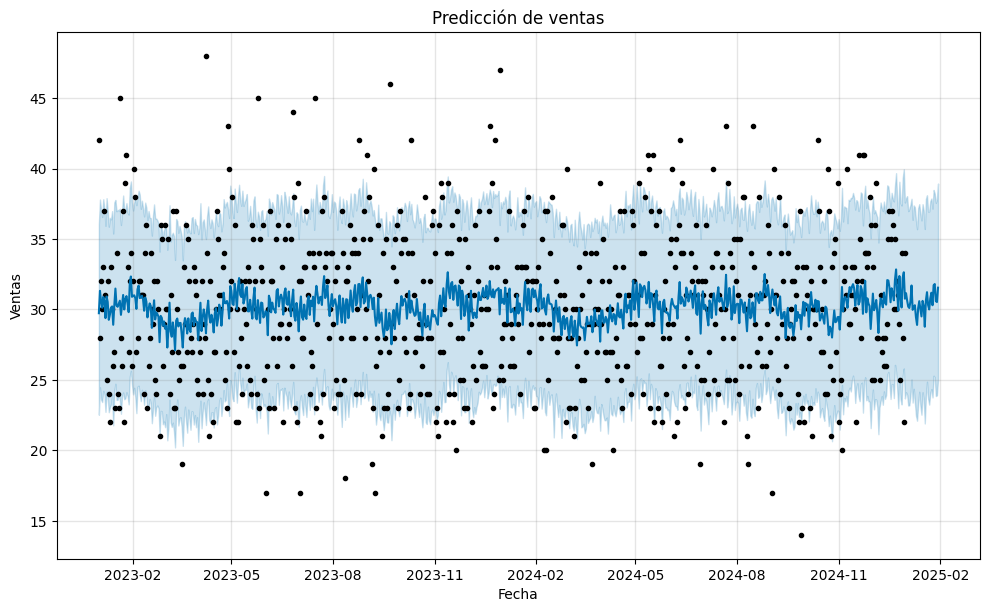

In [38]:
import pandas as pd
import numpy as np
from prophet import Prophet
import plotly.io as pio
import matplotlib.pyplot as plt


# Visualización bonita
pio.renderers.default = 'browser'  # Cambia a 'browser' si estás en VSCode o .py

# Simular dataset
np.random.seed(42)
fechas = pd.date_range(start='2023-01-01', end='2024-12-31')
producto = 'Producto A'

df = pd.DataFrame({
    'ds': fechas,
    'producto': producto,
    'precio': np.random.normal(loc=10, scale=2, size=len(fechas)).round(2),
    'stock': np.random.randint(50, 150, size=len(fechas)),
    'y': np.random.poisson(lam=30, size=len(fechas))  # Ventas diarias simuladas
})

print(df.head())


# Agregar columna de fin de semana
df['fin_de_semana'] = df['ds'].dt.dayofweek.isin([5, 6]).astype(int)

# Feriados simulados (puedes poner reales si quieres)
feriados = pd.DataFrame({
    'holiday': 'feriado',
    'ds': pd.to_datetime(['2023-01-01', '2023-12-25', '2024-01-01', '2024-07-28', '2024-12-25']),
    'lower_window': 0,
    'upper_window': 0,
})
print(feriados)

# Crear modelo Prophet
modelo = Prophet(holidays=feriados)
modelo.add_regressor('precio')
modelo.add_regressor('stock')
modelo.add_regressor('fin_de_semana')

# Entrenar modelo
modelo.fit(df)

# Crear fechas futuras
futuro = modelo.make_future_dataframe(periods=30)

# Simular datos para fechas futuras
futuro['precio'] = np.random.normal(10, 2, size=len(futuro)).round(2)
futuro['stock'] = np.random.randint(60, 140, size=len(futuro))
futuro['fin_de_semana'] = futuro['ds'].dt.dayofweek.isin([5, 6]).astype(int)



# Predecir
forecast = modelo.predict(futuro)

print("ddddd")
print(forecast.head())


# Mostrar gráfico
# plot_plotly(modelo, forecast)

fig = modelo.plot(forecast)
plt.title("Predicción de ventas")
plt.xlabel("Fecha")
plt.ylabel("Ventas")
plt.show()



19:17:10 - cmdstanpy - INFO - Chain [1] start processing
19:17:11 - cmdstanpy - INFO - Chain [1] done processing



📈 Predicción para Pan Chabatta


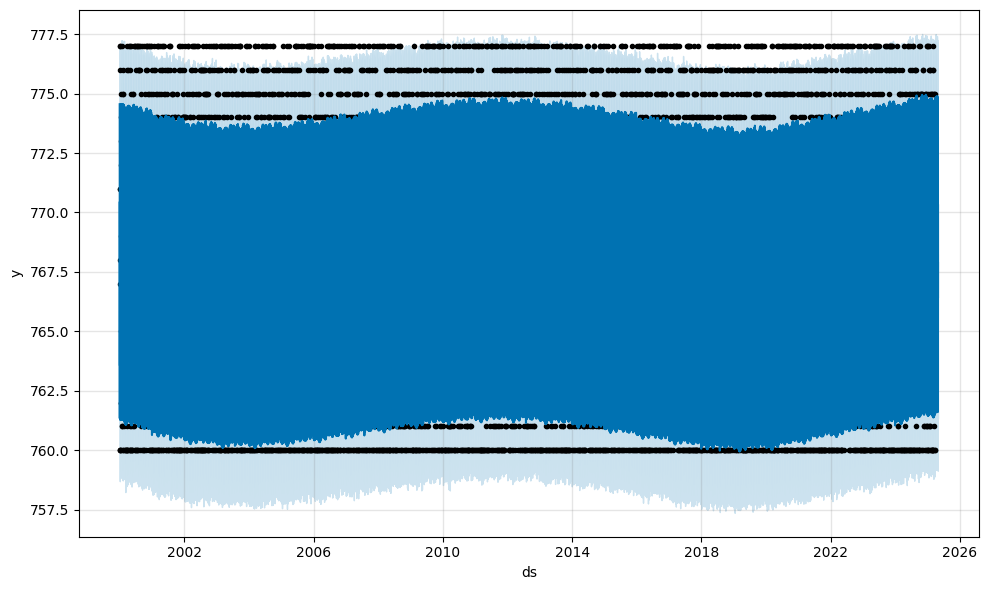

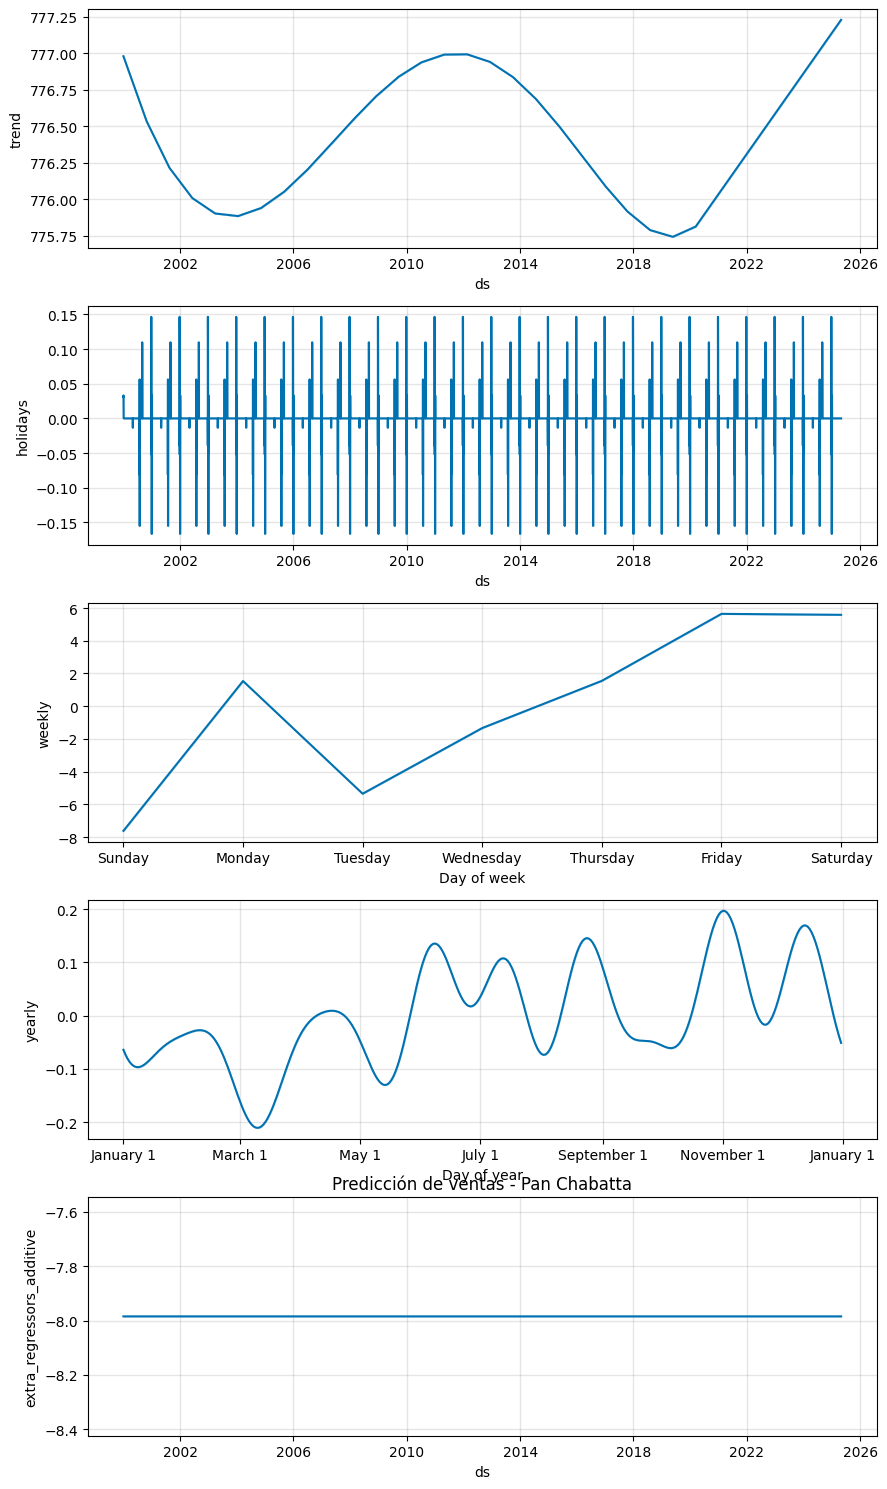

  0%|          | 0/3 [00:00<?, ?it/s]19:17:13 - cmdstanpy - INFO - Chain [1] start processing
19:17:14 - cmdstanpy - INFO - Chain [1] done processing
 33%|███▎      | 1/3 [00:01<00:03,  1.53s/it]19:17:14 - cmdstanpy - INFO - Chain [1] start processing
19:17:15 - cmdstanpy - INFO - Chain [1] done processing
 67%|██████▋   | 2/3 [00:02<00:01,  1.34s/it]19:17:15 - cmdstanpy - INFO - Chain [1] start processing
19:17:16 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 3/3 [00:03<00:00,  1.17s/it]
/Users/giampieermariscal/Downloads/py_2/.venv/lib/python3.13/site-packages/prophet/plot.py:546: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.

/Users/giampieermariscal/Downloads/py_2/.venv/lib/python3.13/site-packages/prophet/plot.py:547: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.



╒═════╤═══════════════════╤═════════╤═════════╤═════════╤════════════╤════════════╤════════════╤════════════╕
│     │ horizon           │     mse │    rmse │     mae │       mape │      mdape │      smape │   coverage │
╞═════╪═══════════════════╪═════════╪═════════╪═════════╪════════════╪════════════╪════════════╪════════════╡
│   0 │ 37 days 00:00:00  │ 4.01518 │ 2.00379 │ 1.70963 │ 0.00222247 │ 0.00213048 │ 0.00222336 │   0.776758 │
├─────┼───────────────────┼─────────┼─────────┼─────────┼────────────┼────────────┼────────────┼────────────┤
│   1 │ 38 days 00:00:00  │ 4.02913 │ 2.00727 │ 1.71364 │ 0.00222757 │ 0.00216788 │ 0.00222845 │   0.770642 │
├─────┼───────────────────┼─────────┼─────────┼─────────┼────────────┼────────────┼────────────┼────────────┤
│   2 │ 39 days 00:00:00  │ 3.96001 │ 1.98998 │ 1.6955  │ 0.00220414 │ 0.00216788 │ 0.00220509 │   0.788991 │
├─────┼───────────────────┼─────────┼─────────┼─────────┼────────────┼────────────┼────────────┼────────────┤
│   3 │ 40

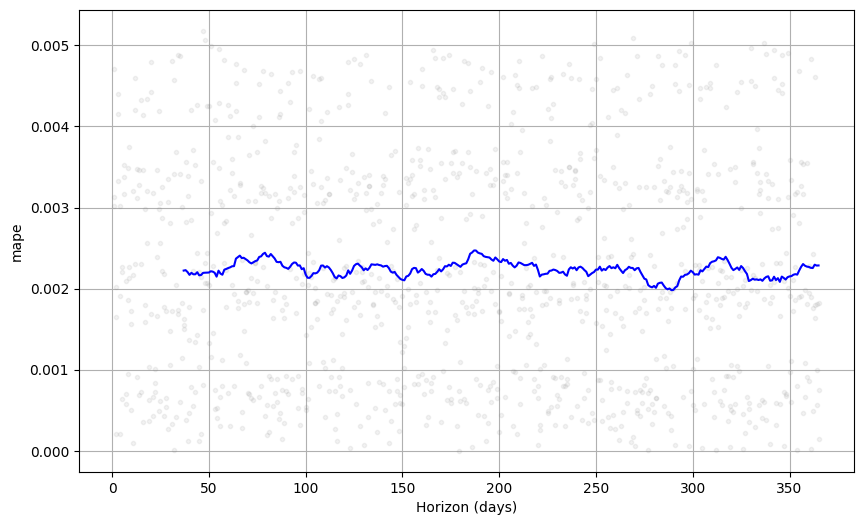

19:17:16 - cmdstanpy - INFO - Chain [1] start processing
19:17:17 - cmdstanpy - INFO - Chain [1] done processing



📈 Predicción para Pan Francés


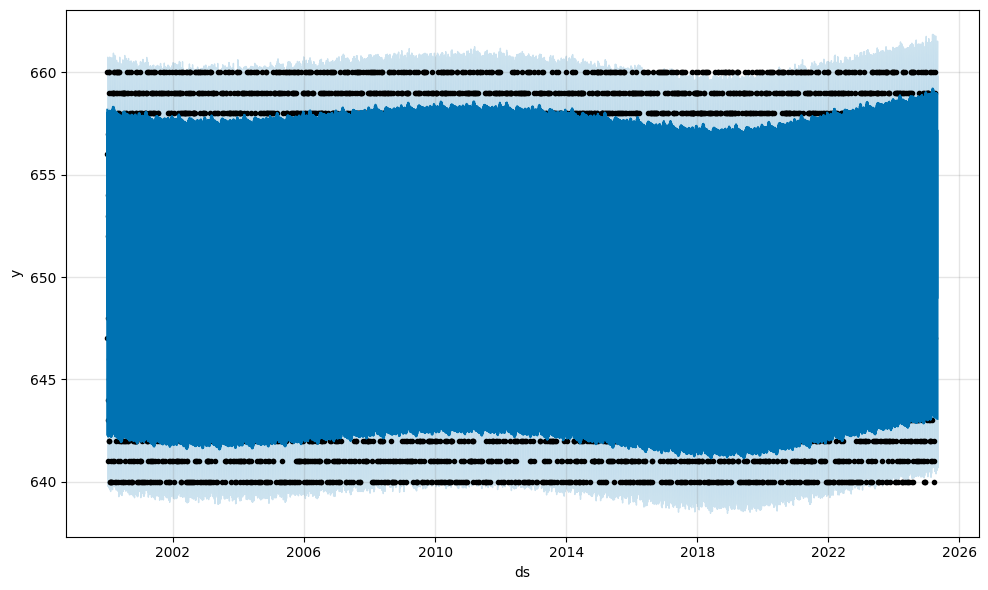

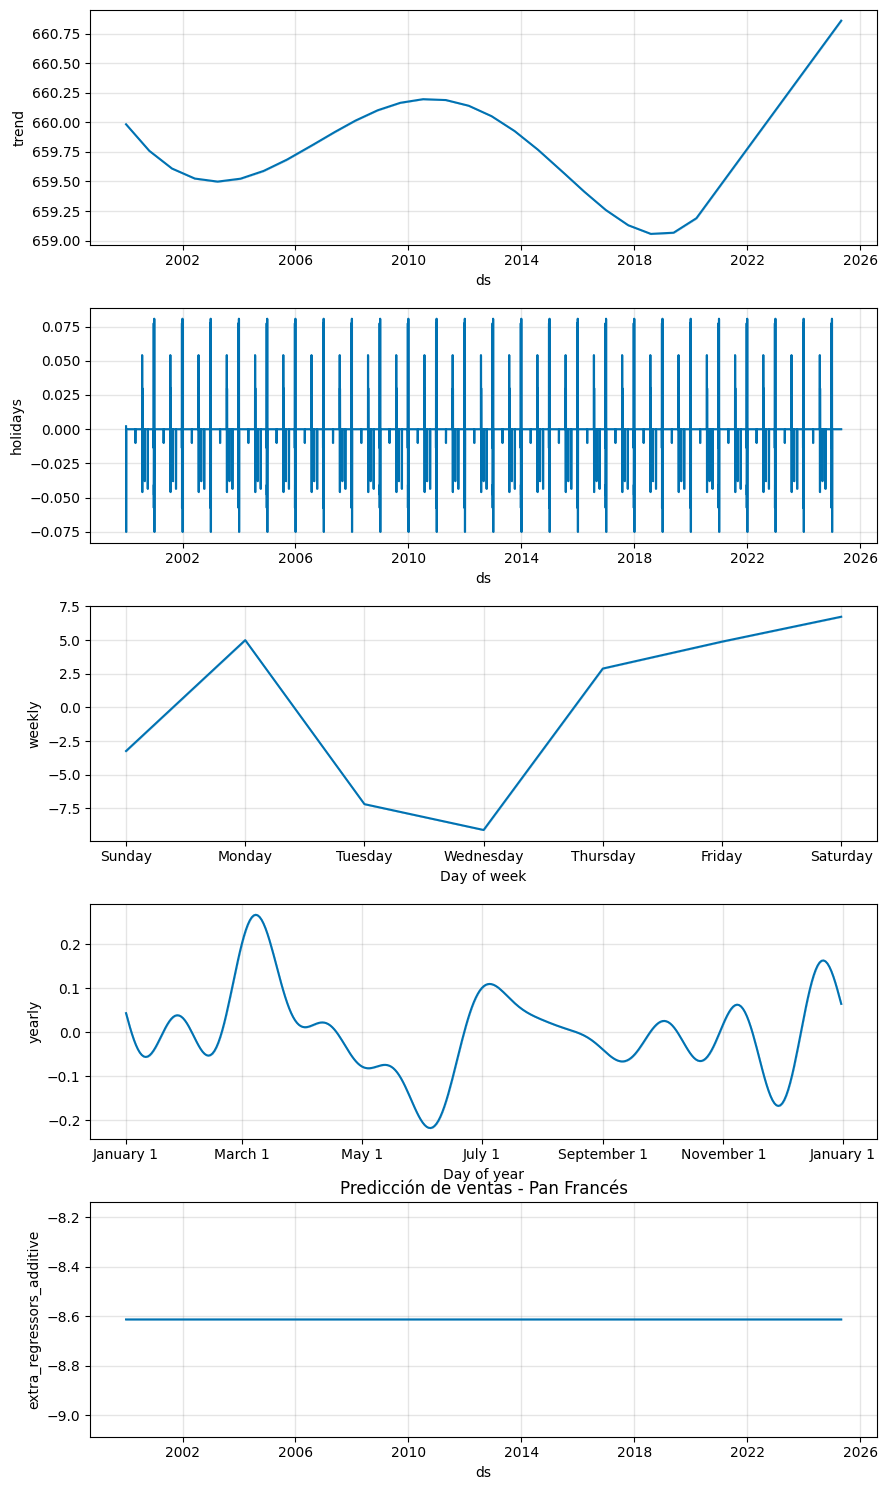

  0%|          | 0/3 [00:00<?, ?it/s]19:17:19 - cmdstanpy - INFO - Chain [1] start processing
19:17:19 - cmdstanpy - INFO - Chain [1] done processing
 33%|███▎      | 1/3 [00:00<00:01,  1.41it/s]19:17:19 - cmdstanpy - INFO - Chain [1] start processing
19:17:20 - cmdstanpy - INFO - Chain [1] done processing
 67%|██████▋   | 2/3 [00:01<00:00,  1.26it/s]19:17:20 - cmdstanpy - INFO - Chain [1] start processing
19:17:21 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 3/3 [00:03<00:00,  1.03s/it]
/Users/giampieermariscal/Downloads/py_2/.venv/lib/python3.13/site-packages/prophet/plot.py:546: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.

/Users/giampieermariscal/Downloads/py_2/.venv/lib/python3.13/site-packages/prophet/plot.py:547: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.



╒═════╤═══════════════════╤═════════╤═════════╤═════════╤════════════╤════════════╤════════════╤════════════╕
│     │ horizon           │     mse │    rmse │     mae │       mape │      mdape │      smape │   coverage │
╞═════╪═══════════════════╪═════════╪═════════╪═════════╪════════════╪════════════╪════════════╪════════════╡
│   0 │ 37 days 00:00:00  │ 4.70762 │ 2.16971 │ 1.81337 │ 0.00278814 │ 0.00215354 │ 0.00278614 │   0.712538 │
├─────┼───────────────────┼─────────┼─────────┼─────────┼────────────┼────────────┼────────────┼────────────┤
│   1 │ 38 days 00:00:00  │ 4.67262 │ 2.16162 │ 1.80952 │ 0.00278207 │ 0.00209597 │ 0.0027802  │   0.712538 │
├─────┼───────────────────┼─────────┼─────────┼─────────┼────────────┼────────────┼────────────┼────────────┤
│   2 │ 39 days 00:00:00  │ 4.68829 │ 2.16525 │ 1.80324 │ 0.00277215 │ 0.00215354 │ 0.00277026 │   0.712538 │
├─────┼───────────────────┼─────────┼─────────┼─────────┼────────────┼────────────┼────────────┼────────────┤
│   3 │ 40

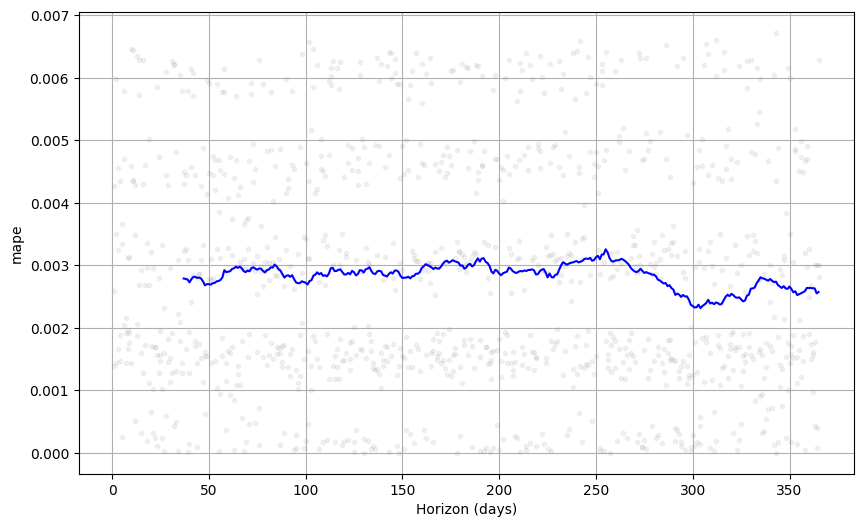

19:17:22 - cmdstanpy - INFO - Chain [1] start processing
19:17:22 - cmdstanpy - INFO - Chain [1] done processing



📈 Predicción para Pan Yema Largo


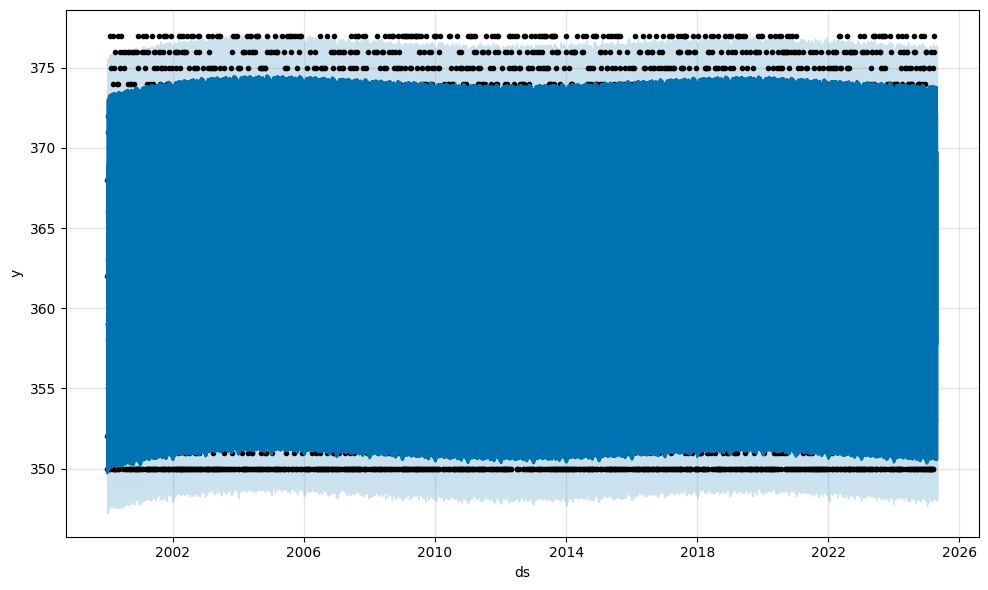

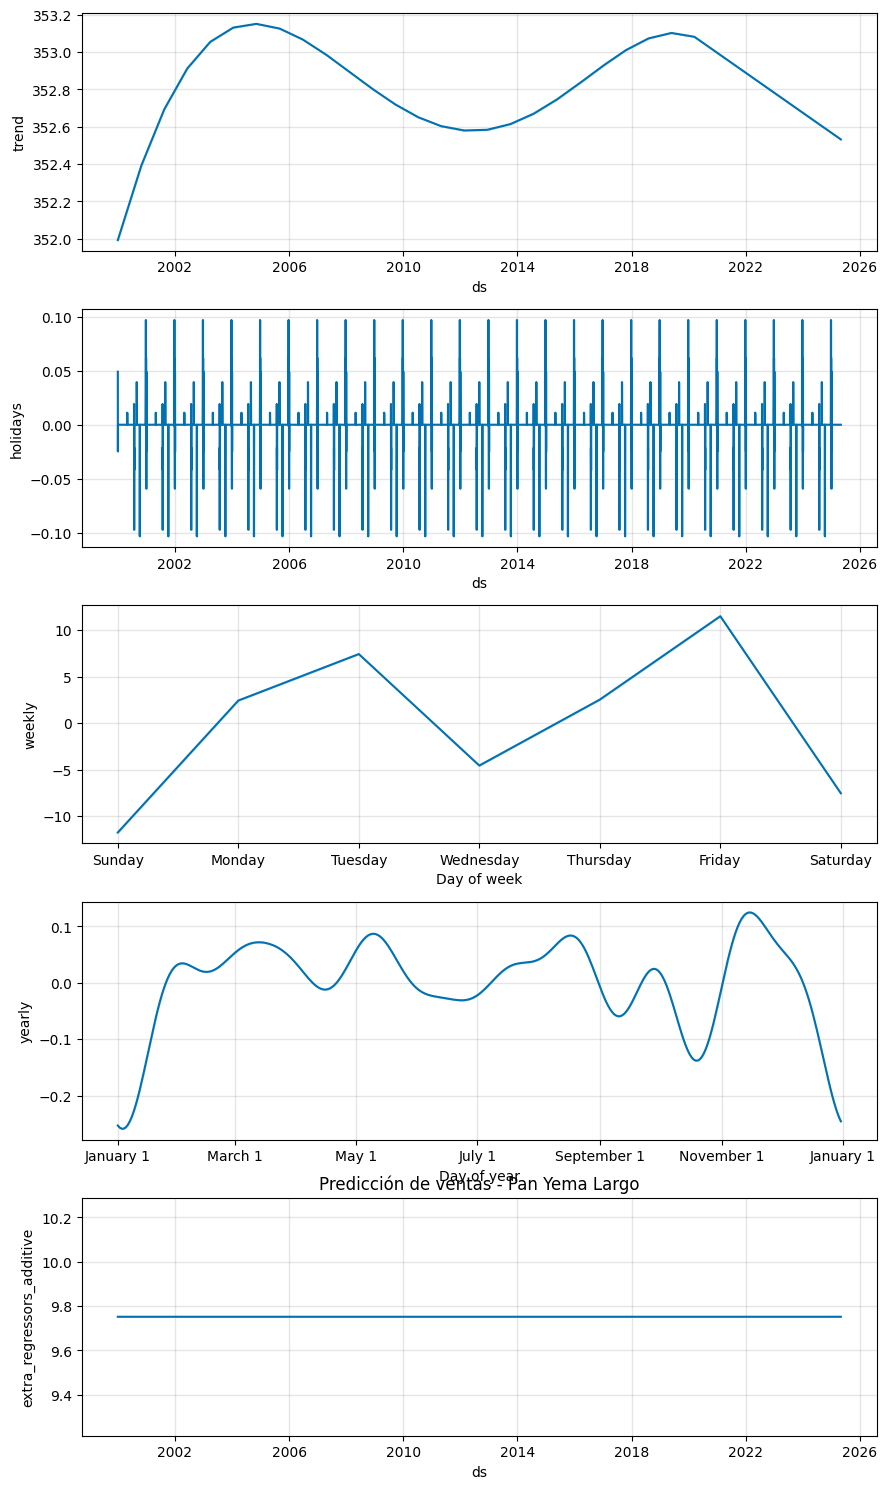

  0%|          | 0/3 [00:00<?, ?it/s]19:17:24 - cmdstanpy - INFO - Chain [1] start processing
19:17:25 - cmdstanpy - INFO - Chain [1] done processing
 33%|███▎      | 1/3 [00:00<00:01,  1.26it/s]19:17:25 - cmdstanpy - INFO - Chain [1] start processing
19:17:26 - cmdstanpy - INFO - Chain [1] done processing
 67%|██████▋   | 2/3 [00:01<00:00,  1.08it/s]19:17:26 - cmdstanpy - INFO - Chain [1] start processing
19:17:27 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 3/3 [00:02<00:00,  1.15it/s]
/Users/giampieermariscal/Downloads/py_2/.venv/lib/python3.13/site-packages/prophet/plot.py:546: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.

/Users/giampieermariscal/Downloads/py_2/.venv/lib/python3.13/site-packages/prophet/plot.py:547: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.



╒═════╤═══════════════════╤═════════╤═════════╤═════════╤════════════╤════════════╤════════════╤════════════╕
│     │ horizon           │     mse │    rmse │     mae │       mape │      mdape │      smape │   coverage │
╞═════╪═══════════════════╪═════════╪═════════╪═════════╪════════════╪════════════╪════════════╪════════════╡
│   0 │ 37 days 00:00:00  │ 3.43629 │ 1.85372 │ 1.58993 │ 0.00437724 │ 0.00429137 │ 0.00438215 │   0.795107 │
├─────┼───────────────────┼─────────┼─────────┼─────────┼────────────┼────────────┼────────────┼────────────┤
│   1 │ 38 days 00:00:00  │ 3.59135 │ 1.89509 │ 1.63281 │ 0.00449545 │ 0.00434002 │ 0.00450104 │   0.779817 │
├─────┼───────────────────┼─────────┼─────────┼─────────┼────────────┼────────────┼────────────┼────────────┤
│   2 │ 39 days 00:00:00  │ 3.59882 │ 1.89705 │ 1.63807 │ 0.00450764 │ 0.00442715 │ 0.00451326 │   0.782875 │
├─────┼───────────────────┼─────────┼─────────┼─────────┼────────────┼────────────┼────────────┼────────────┤
│   3 │ 40

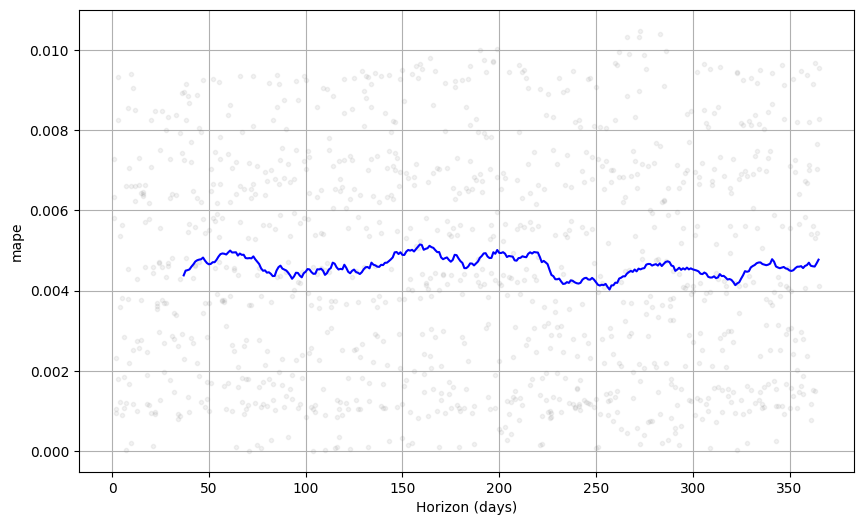

19:17:27 - cmdstanpy - INFO - Chain [1] start processing
19:17:27 - cmdstanpy - INFO - Chain [1] done processing



📈 Predicción para Pan Yema Redondo


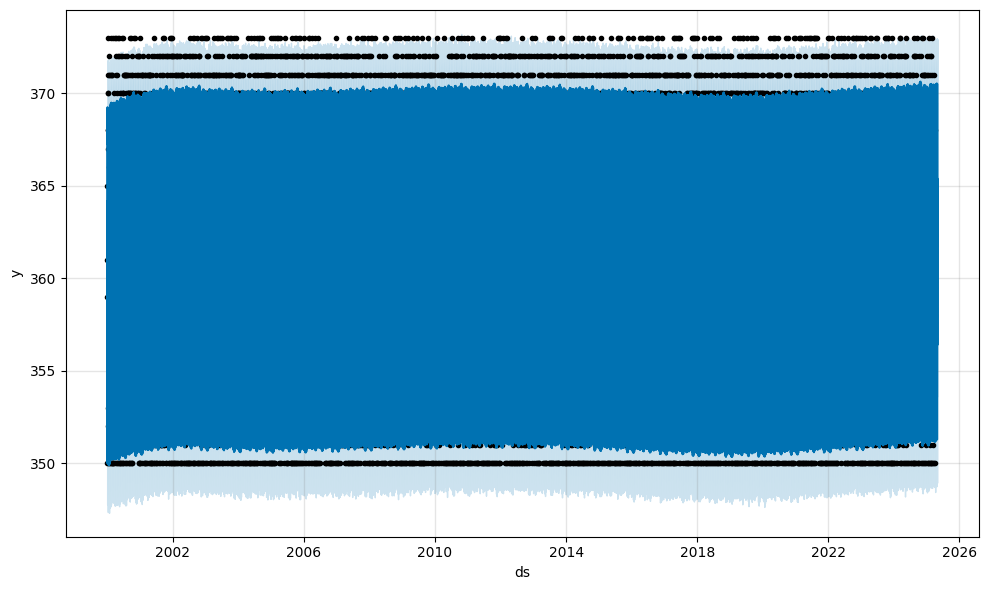

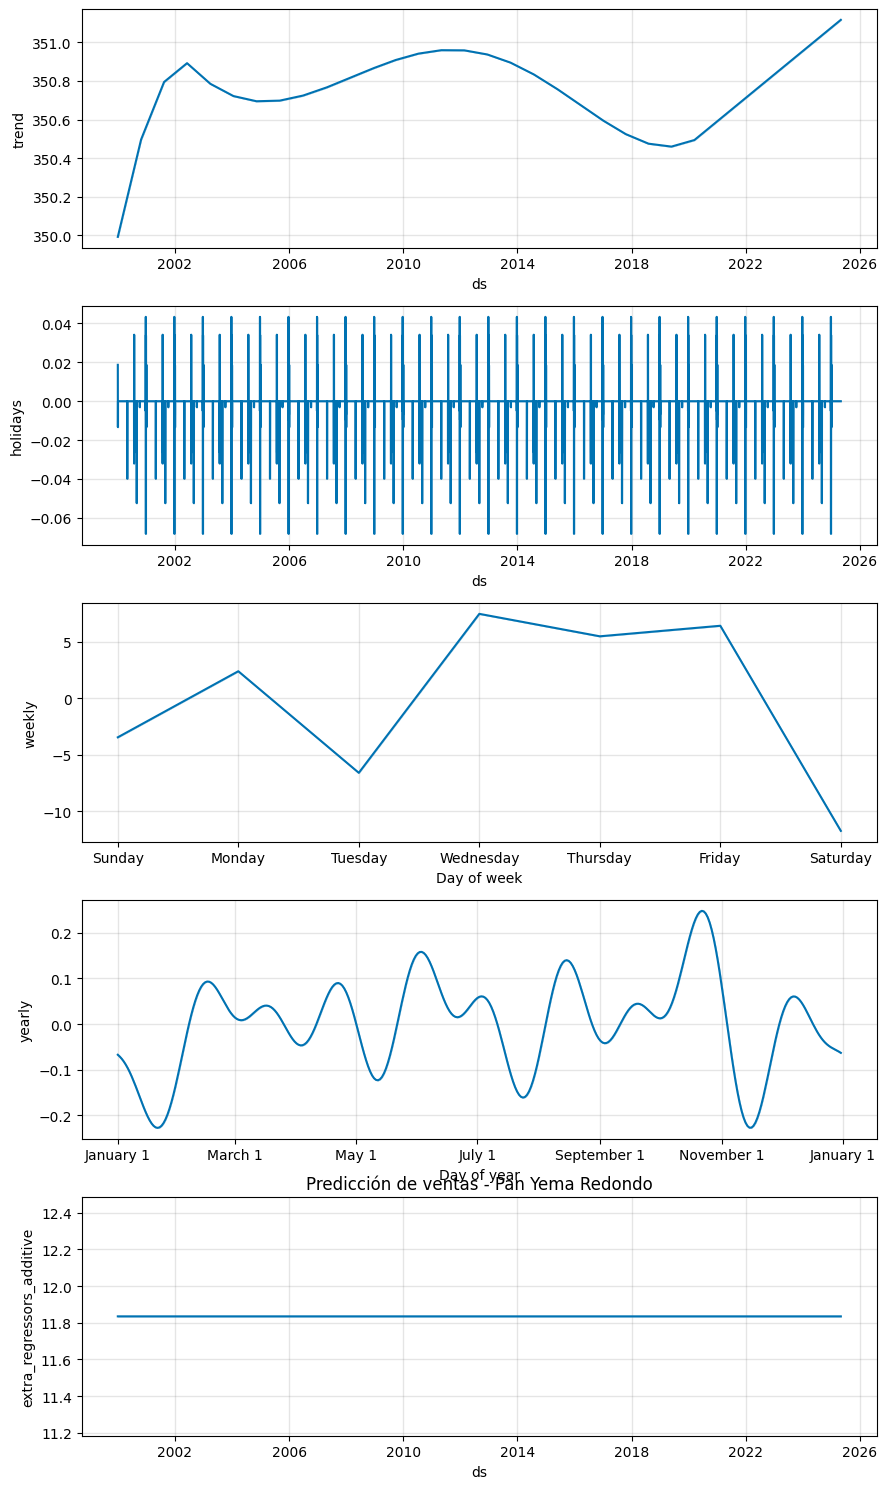

  0%|          | 0/3 [00:00<?, ?it/s]19:17:29 - cmdstanpy - INFO - Chain [1] start processing
19:17:30 - cmdstanpy - INFO - Chain [1] done processing
 33%|███▎      | 1/3 [00:00<00:01,  1.17it/s]19:17:30 - cmdstanpy - INFO - Chain [1] start processing
19:17:31 - cmdstanpy - INFO - Chain [1] done processing
 67%|██████▋   | 2/3 [00:01<00:00,  1.09it/s]19:17:31 - cmdstanpy - INFO - Chain [1] start processing
19:17:32 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 3/3 [00:02<00:00,  1.14it/s]
/Users/giampieermariscal/Downloads/py_2/.venv/lib/python3.13/site-packages/prophet/plot.py:546: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.

/Users/giampieermariscal/Downloads/py_2/.venv/lib/python3.13/site-packages/prophet/plot.py:547: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.



╒═════╤═══════════════════╤═════════╤═════════╤═════════╤════════════╤════════════╤════════════╤════════════╕
│     │ horizon           │     mse │    rmse │     mae │       mape │      mdape │      smape │   coverage │
╞═════╪═══════════════════╪═════════╪═════════╪═════════╪════════════╪════════════╪════════════╪════════════╡
│   0 │ 37 days 00:00:00  │ 3.89077 │ 1.9725  │ 1.68503 │ 0.00463638 │ 0.00452541 │ 0.0046396  │   0.721713 │
├─────┼───────────────────┼─────────┼─────────┼─────────┼────────────┼────────────┼────────────┼────────────┤
│   1 │ 38 days 00:00:00  │ 3.81596 │ 1.95345 │ 1.67637 │ 0.00461257 │ 0.00452541 │ 0.00461527 │   0.737003 │
├─────┼───────────────────┼─────────┼─────────┼─────────┼────────────┼────────────┼────────────┼────────────┤
│   2 │ 39 days 00:00:00  │ 3.81288 │ 1.95266 │ 1.67449 │ 0.00460763 │ 0.00475585 │ 0.00461074 │   0.740061 │
├─────┼───────────────────┼─────────┼─────────┼─────────┼────────────┼────────────┼────────────┼────────────┤
│   3 │ 40

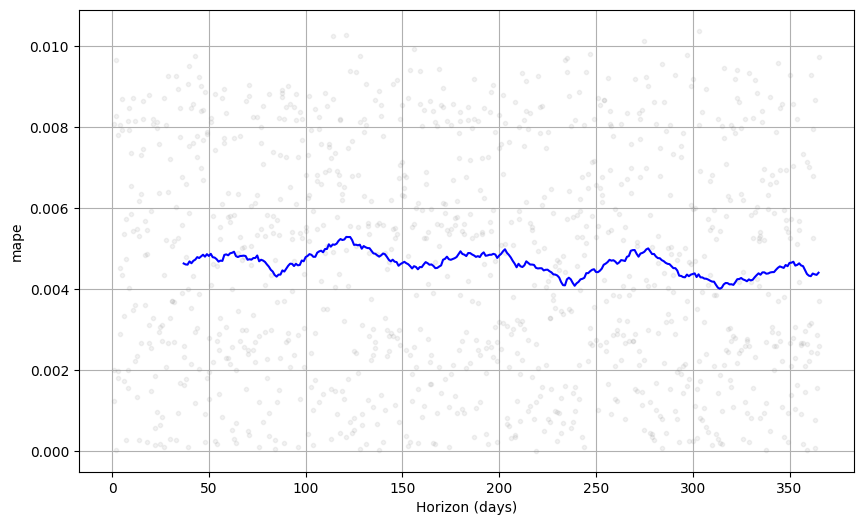

19:17:32 - cmdstanpy - INFO - Chain [1] start processing
19:17:33 - cmdstanpy - INFO - Chain [1] done processing



📈 Predicción para Pan Chapla


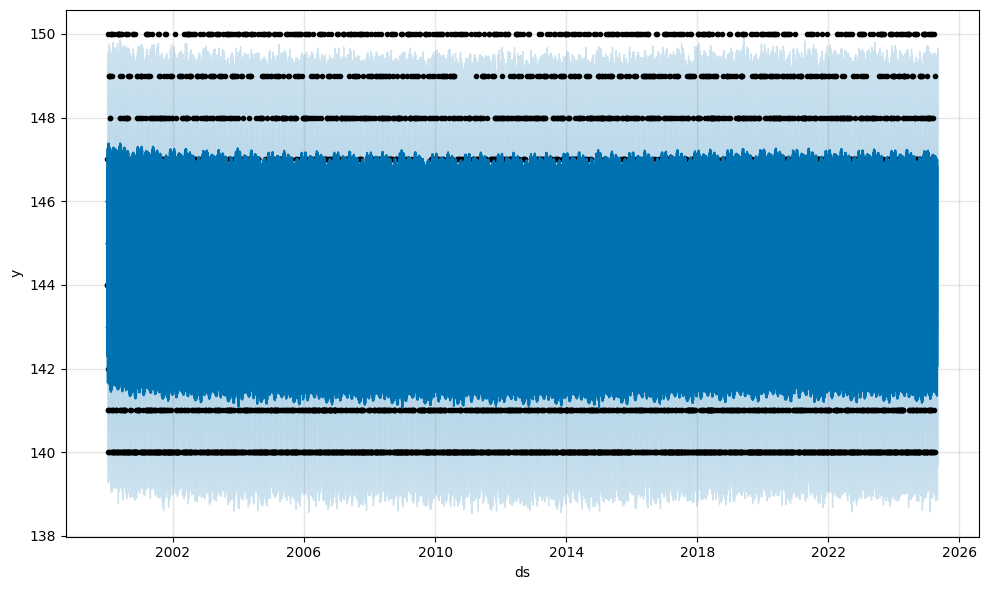

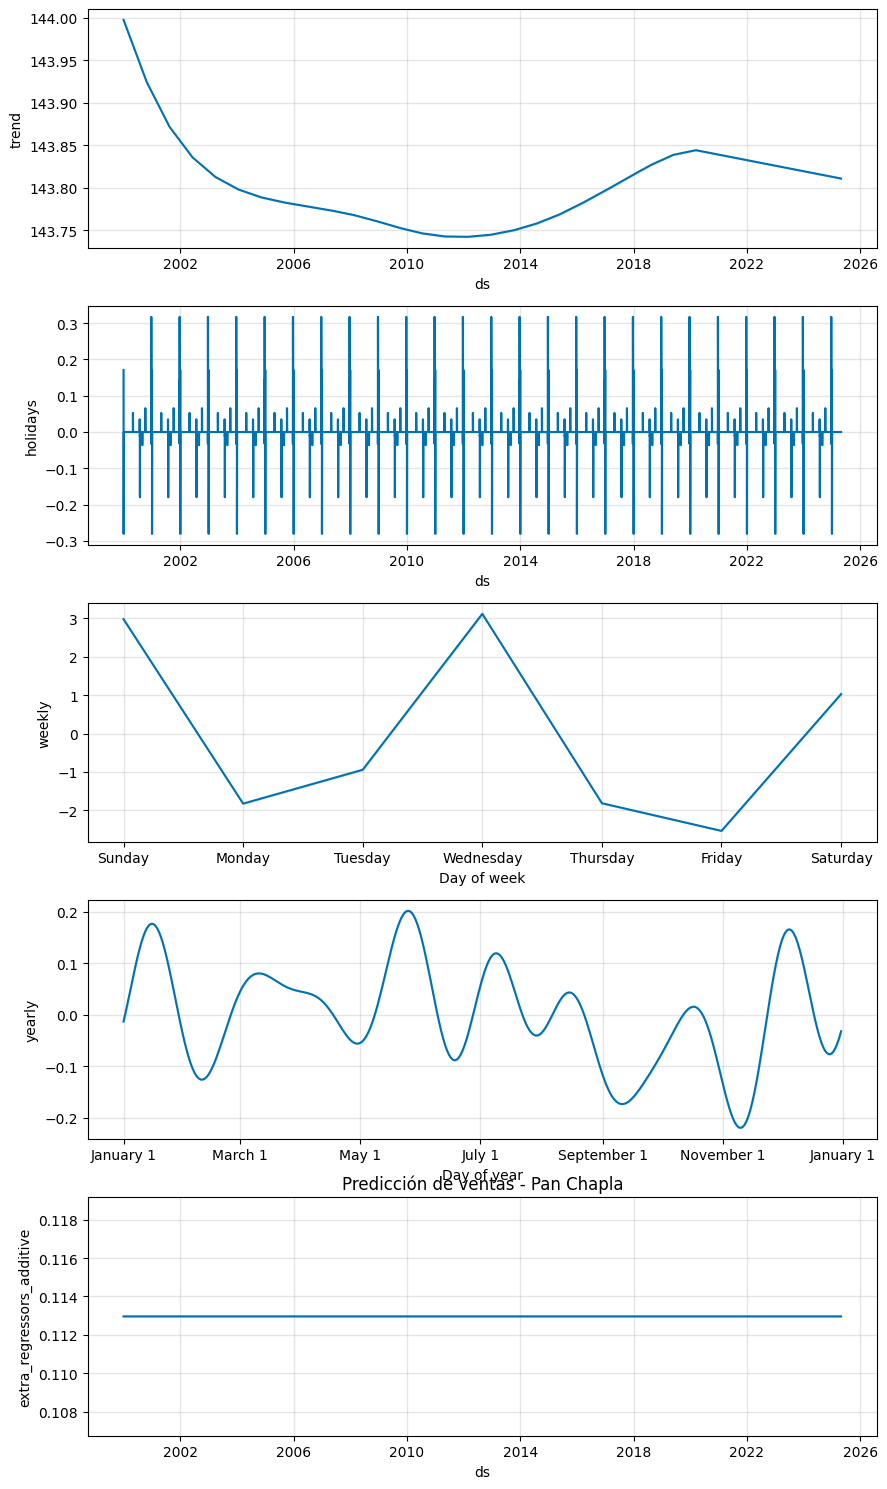

  0%|          | 0/3 [00:00<?, ?it/s]19:17:34 - cmdstanpy - INFO - Chain [1] start processing
19:17:35 - cmdstanpy - INFO - Chain [1] done processing
 33%|███▎      | 1/3 [00:00<00:01,  1.39it/s]19:17:35 - cmdstanpy - INFO - Chain [1] start processing
19:17:35 - cmdstanpy - INFO - Chain [1] done processing
 67%|██████▋   | 2/3 [00:01<00:00,  1.57it/s]19:17:36 - cmdstanpy - INFO - Chain [1] start processing
19:17:36 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 3/3 [00:02<00:00,  1.43it/s]
/Users/giampieermariscal/Downloads/py_2/.venv/lib/python3.13/site-packages/prophet/plot.py:546: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.

/Users/giampieermariscal/Downloads/py_2/.venv/lib/python3.13/site-packages/prophet/plot.py:547: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.



╒═════╤═══════════════════╤═════════╤═════════╤═════════╤═══════════╤════════════╤═══════════╤════════════╕
│     │ horizon           │     mse │    rmse │     mae │      mape │      mdape │     smape │   coverage │
╞═════╪═══════════════════╪═════════╪═════════╪═════════╪═══════════╪════════════╪═══════════╪════════════╡
│   0 │ 37 days 00:00:00  │ 3.65691 │ 1.91231 │ 1.66568 │ 0.0115395 │ 0.0106409  │ 0.0115473 │   0.764526 │
├─────┼───────────────────┼─────────┼─────────┼─────────┼───────────┼────────────┼───────────┼────────────┤
│   1 │ 38 days 00:00:00  │ 3.59694 │ 1.89656 │ 1.6548  │ 0.0114603 │ 0.0106409  │ 0.0114702 │   0.776758 │
├─────┼───────────────────┼─────────┼─────────┼─────────┼───────────┼────────────┼───────────┼────────────┤
│   2 │ 39 days 00:00:00  │ 3.57341 │ 1.89035 │ 1.64279 │ 0.0113764 │ 0.0105865  │ 0.0113881 │   0.776758 │
├─────┼───────────────────┼─────────┼─────────┼─────────┼───────────┼────────────┼───────────┼────────────┤
│   3 │ 40 days 00:00:00  │ 

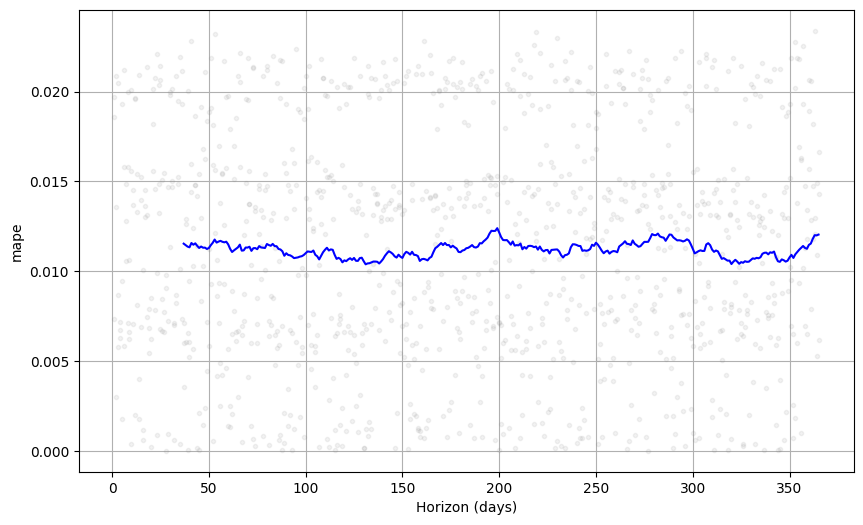

19:17:37 - cmdstanpy - INFO - Chain [1] start processing
19:17:37 - cmdstanpy - INFO - Chain [1] done processing



📈 Predicción para Pan Coliza


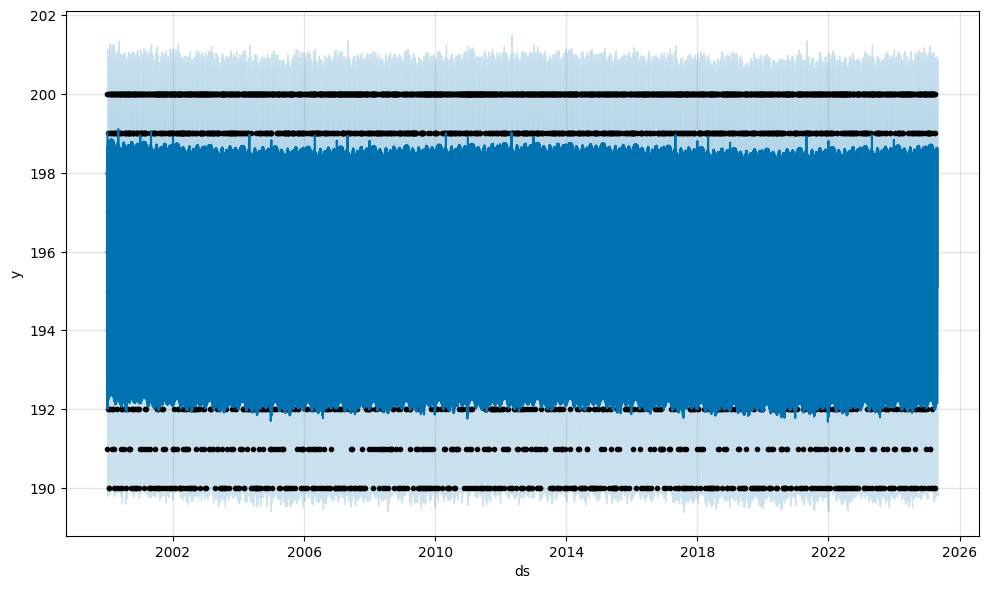

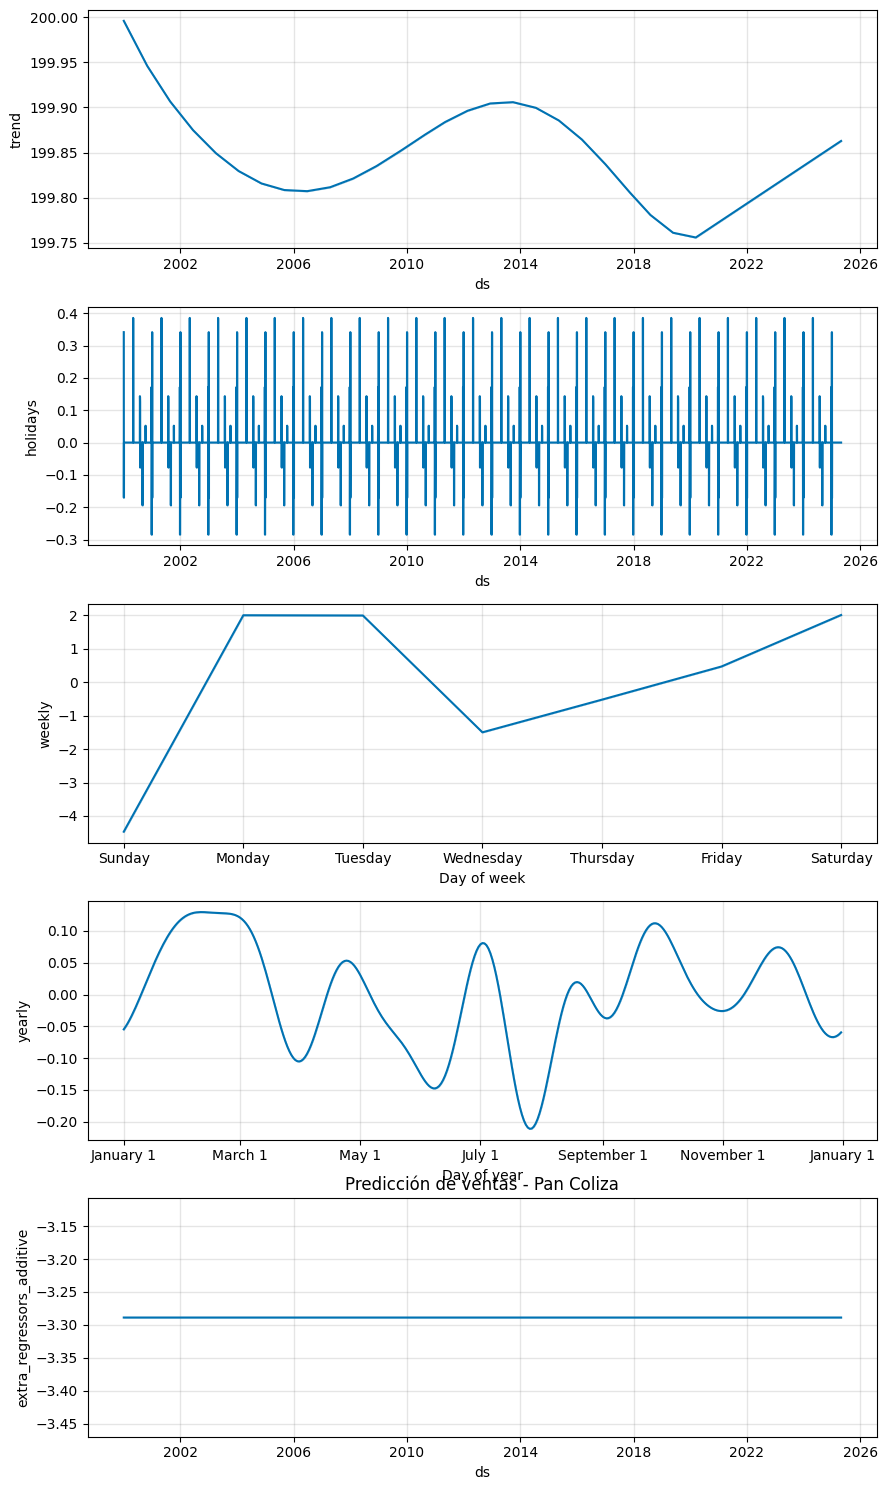

  0%|          | 0/3 [00:00<?, ?it/s]19:17:39 - cmdstanpy - INFO - Chain [1] start processing
19:17:40 - cmdstanpy - INFO - Chain [1] done processing
 33%|███▎      | 1/3 [00:00<00:01,  1.19it/s]19:17:40 - cmdstanpy - INFO - Chain [1] start processing
19:17:40 - cmdstanpy - INFO - Chain [1] done processing
 67%|██████▋   | 2/3 [00:01<00:00,  1.27it/s]19:17:41 - cmdstanpy - INFO - Chain [1] start processing
19:17:41 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 3/3 [00:02<00:00,  1.14it/s]
/Users/giampieermariscal/Downloads/py_2/.venv/lib/python3.13/site-packages/prophet/plot.py:546: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.

/Users/giampieermariscal/Downloads/py_2/.venv/lib/python3.13/site-packages/prophet/plot.py:547: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.



╒═════╤═══════════════════╤═════════╤═════════╤═════════╤════════════╤════════════╤════════════╤════════════╕
│     │ horizon           │     mse │    rmse │     mae │       mape │      mdape │      smape │   coverage │
╞═════╪═══════════════════╪═════════╪═════════╪═════════╪════════════╪════════════╪════════════╪════════════╡
│   0 │ 37 days 00:00:00  │ 2.65851 │ 1.63049 │ 1.40809 │ 0.00718177 │ 0.00671527 │ 0.00717483 │   0.834862 │
├─────┼───────────────────┼─────────┼─────────┼─────────┼────────────┼────────────┼────────────┼────────────┤
│   1 │ 38 days 00:00:00  │ 2.65231 │ 1.62859 │ 1.40744 │ 0.00717705 │ 0.00643632 │ 0.0071703  │   0.834862 │
├─────┼───────────────────┼─────────┼─────────┼─────────┼────────────┼────────────┼────────────┼────────────┤
│   2 │ 39 days 00:00:00  │ 2.61996 │ 1.61863 │ 1.39154 │ 0.0070963  │ 0.00642944 │ 0.00708978 │   0.834862 │
├─────┼───────────────────┼─────────┼─────────┼─────────┼────────────┼────────────┼────────────┼────────────┤
│   3 │ 40

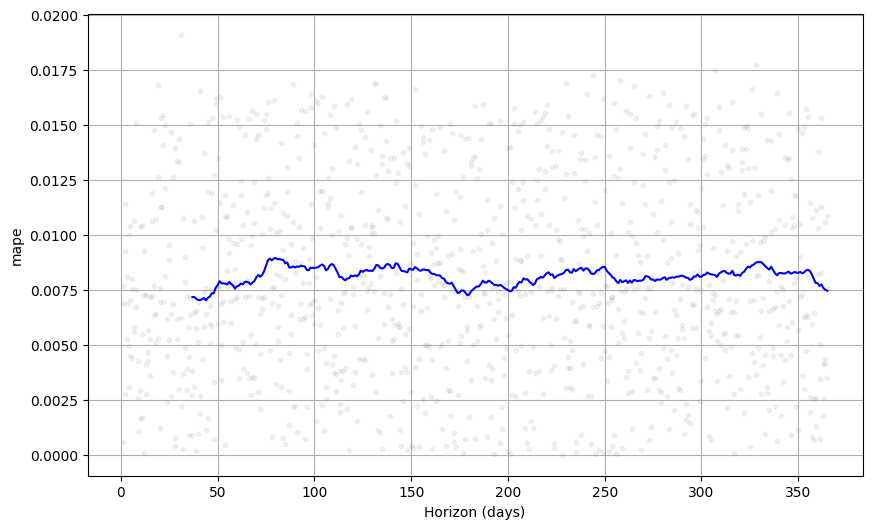

19:17:42 - cmdstanpy - INFO - Chain [1] start processing
19:17:42 - cmdstanpy - INFO - Chain [1] done processing



📈 Predicción para Pan Integral


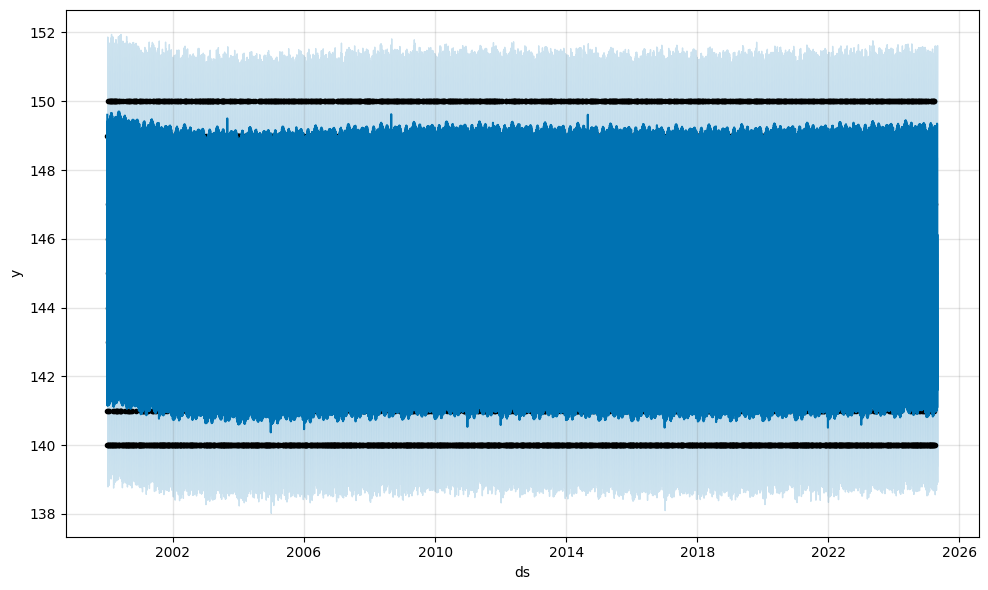

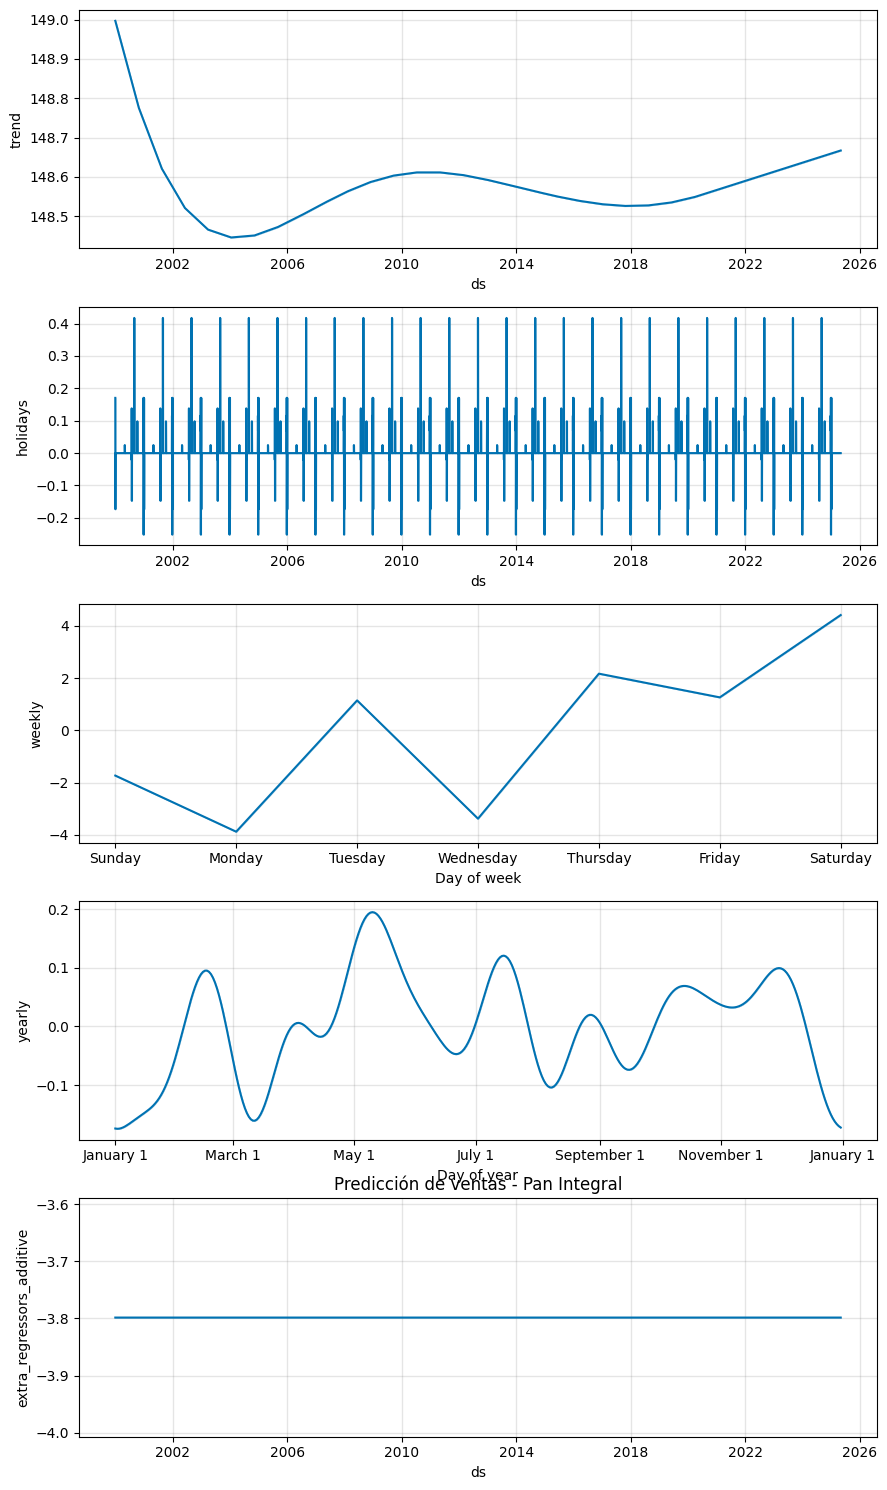

  0%|          | 0/3 [00:00<?, ?it/s]19:17:44 - cmdstanpy - INFO - Chain [1] start processing
19:17:45 - cmdstanpy - INFO - Chain [1] done processing
 33%|███▎      | 1/3 [00:00<00:01,  1.12it/s]19:17:45 - cmdstanpy - INFO - Chain [1] start processing
19:17:46 - cmdstanpy - INFO - Chain [1] done processing
 67%|██████▋   | 2/3 [00:01<00:00,  1.13it/s]19:17:46 - cmdstanpy - INFO - Chain [1] start processing
19:17:47 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 3/3 [00:02<00:00,  1.08it/s]
/Users/giampieermariscal/Downloads/py_2/.venv/lib/python3.13/site-packages/prophet/plot.py:546: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.

/Users/giampieermariscal/Downloads/py_2/.venv/lib/python3.13/site-packages/prophet/plot.py:547: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.



╒═════╤═══════════════════╤═════════╤═════════╤═════════╤════════════╤════════════╤════════════╤════════════╕
│     │ horizon           │     mse │    rmse │     mae │       mape │      mdape │      smape │   coverage │
╞═════╪═══════════════════╪═════════╪═════════╪═════════╪════════════╪════════════╪════════════╪════════════╡
│   0 │ 37 days 00:00:00  │ 2.83833 │ 1.68473 │ 1.42798 │ 0.00985343 │ 0.00828234 │ 0.00985229 │   0.816514 │
├─────┼───────────────────┼─────────┼─────────┼─────────┼────────────┼────────────┼────────────┼────────────┤
│   1 │ 38 days 00:00:00  │ 2.8752  │ 1.69564 │ 1.43962 │ 0.00993647 │ 0.00836139 │ 0.00993408 │   0.807339 │
├─────┼───────────────────┼─────────┼─────────┼─────────┼────────────┼────────────┼────────────┼────────────┤
│   2 │ 39 days 00:00:00  │ 3.01941 │ 1.73765 │ 1.47446 │ 0.0101615  │ 0.00935766 │ 0.0101642  │   0.779817 │
├─────┼───────────────────┼─────────┼─────────┼─────────┼────────────┼────────────┼────────────┼────────────┤
│   3 │ 40

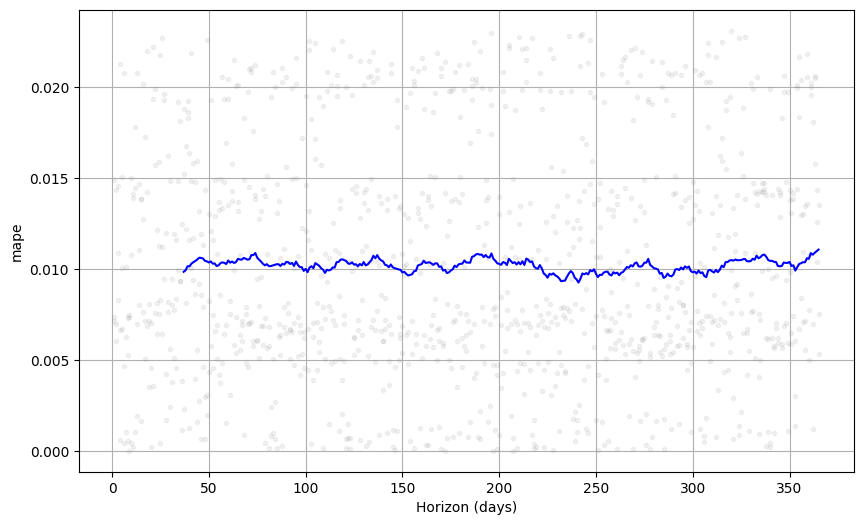

19:17:47 - cmdstanpy - INFO - Chain [1] start processing
19:17:48 - cmdstanpy - INFO - Chain [1] done processing



📈 Predicción para Pan Caracol


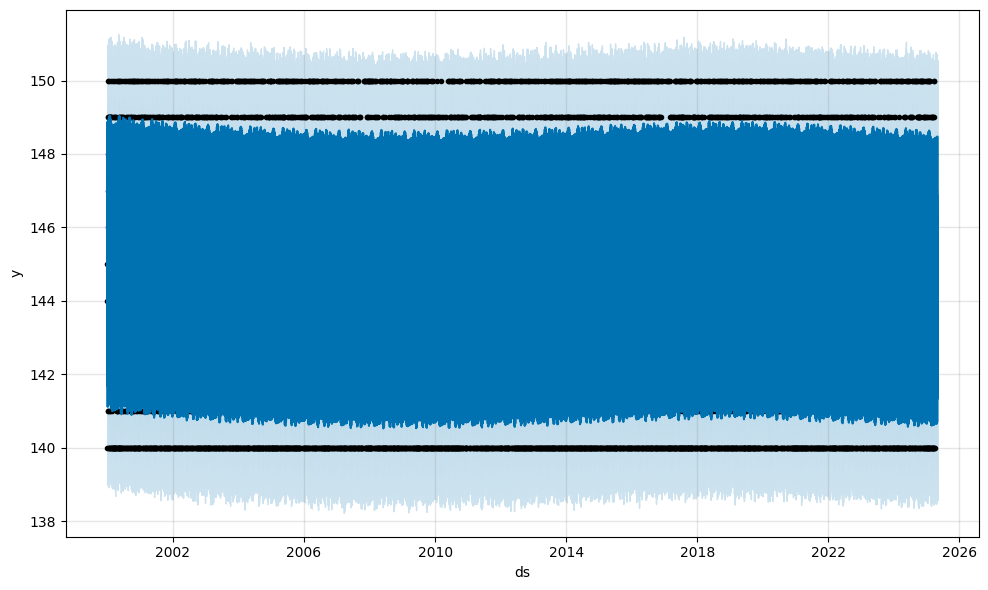

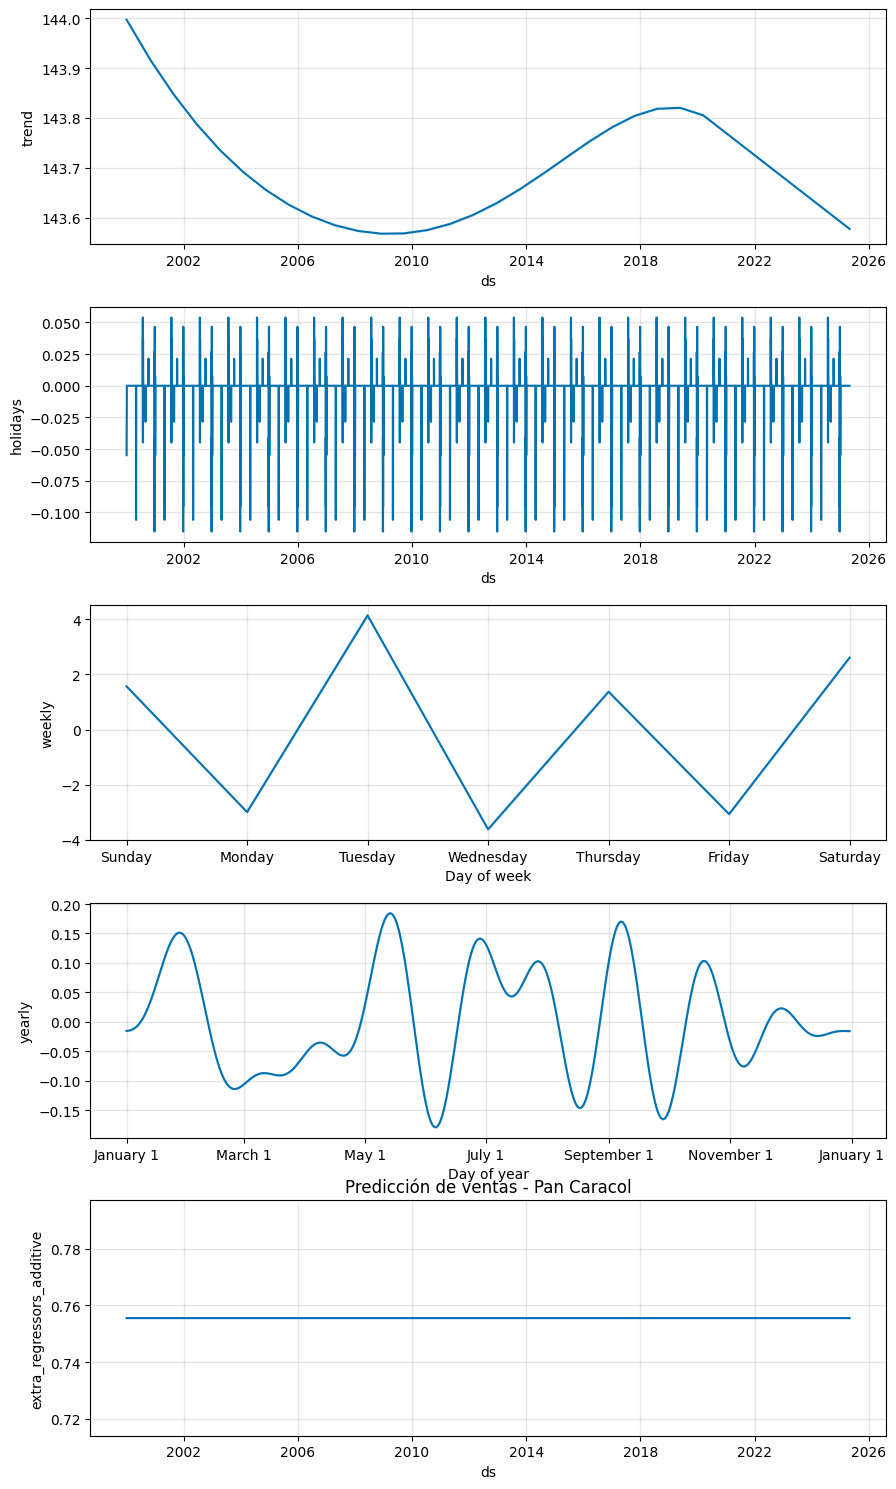

  0%|          | 0/3 [00:00<?, ?it/s]19:17:50 - cmdstanpy - INFO - Chain [1] start processing
19:17:50 - cmdstanpy - INFO - Chain [1] done processing
 33%|███▎      | 1/3 [00:00<00:01,  1.30it/s]19:17:50 - cmdstanpy - INFO - Chain [1] start processing
19:17:51 - cmdstanpy - INFO - Chain [1] done processing
 67%|██████▋   | 2/3 [00:01<00:00,  1.25it/s]19:17:51 - cmdstanpy - INFO - Chain [1] start processing
19:17:52 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 3/3 [00:02<00:00,  1.29it/s]
/Users/giampieermariscal/Downloads/py_2/.venv/lib/python3.13/site-packages/prophet/plot.py:546: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.

/Users/giampieermariscal/Downloads/py_2/.venv/lib/python3.13/site-packages/prophet/plot.py:547: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.



╒═════╤═══════════════════╤═════════╤═════════╤═════════╤════════════╤════════════╤════════════╤════════════╕
│     │ horizon           │     mse │    rmse │     mae │       mape │      mdape │      smape │   coverage │
╞═════╪═══════════════════╪═════════╪═════════╪═════════╪════════════╪════════════╪════════════╪════════════╡
│   0 │ 37 days 00:00:00  │ 2.58832 │ 1.60883 │ 1.39043 │ 0.009596   │ 0.00889386 │ 0.00962253 │   0.776758 │
├─────┼───────────────────┼─────────┼─────────┼─────────┼────────────┼────────────┼────────────┼────────────┤
│   1 │ 38 days 00:00:00  │ 2.68687 │ 1.63917 │ 1.41958 │ 0.00979517 │ 0.00889386 │ 0.00982505 │   0.761468 │
├─────┼───────────────────┼─────────┼─────────┼─────────┼────────────┼────────────┼────────────┼────────────┤
│   2 │ 39 days 00:00:00  │ 2.79207 │ 1.67095 │ 1.44683 │ 0.00997885 │ 0.00950741 │ 0.0100068  │   0.749235 │
├─────┼───────────────────┼─────────┼─────────┼─────────┼────────────┼────────────┼────────────┼────────────┤
│   3 │ 40

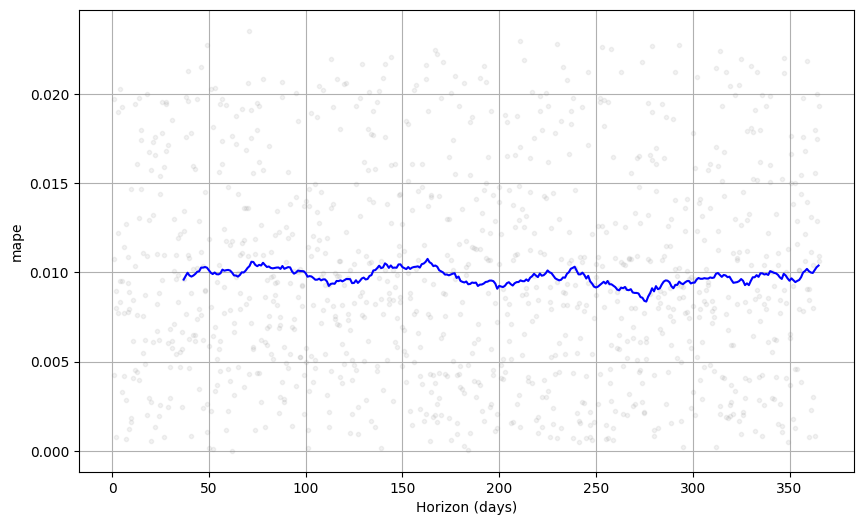

19:17:52 - cmdstanpy - INFO - Chain [1] start processing
19:17:53 - cmdstanpy - INFO - Chain [1] done processing



📈 Predicción para Pan Hamburguesa


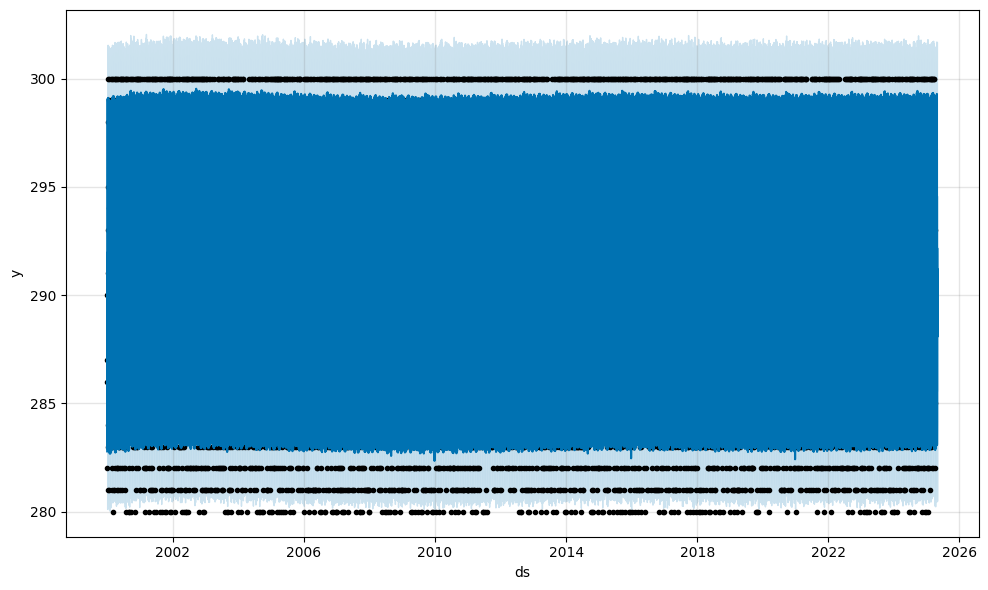

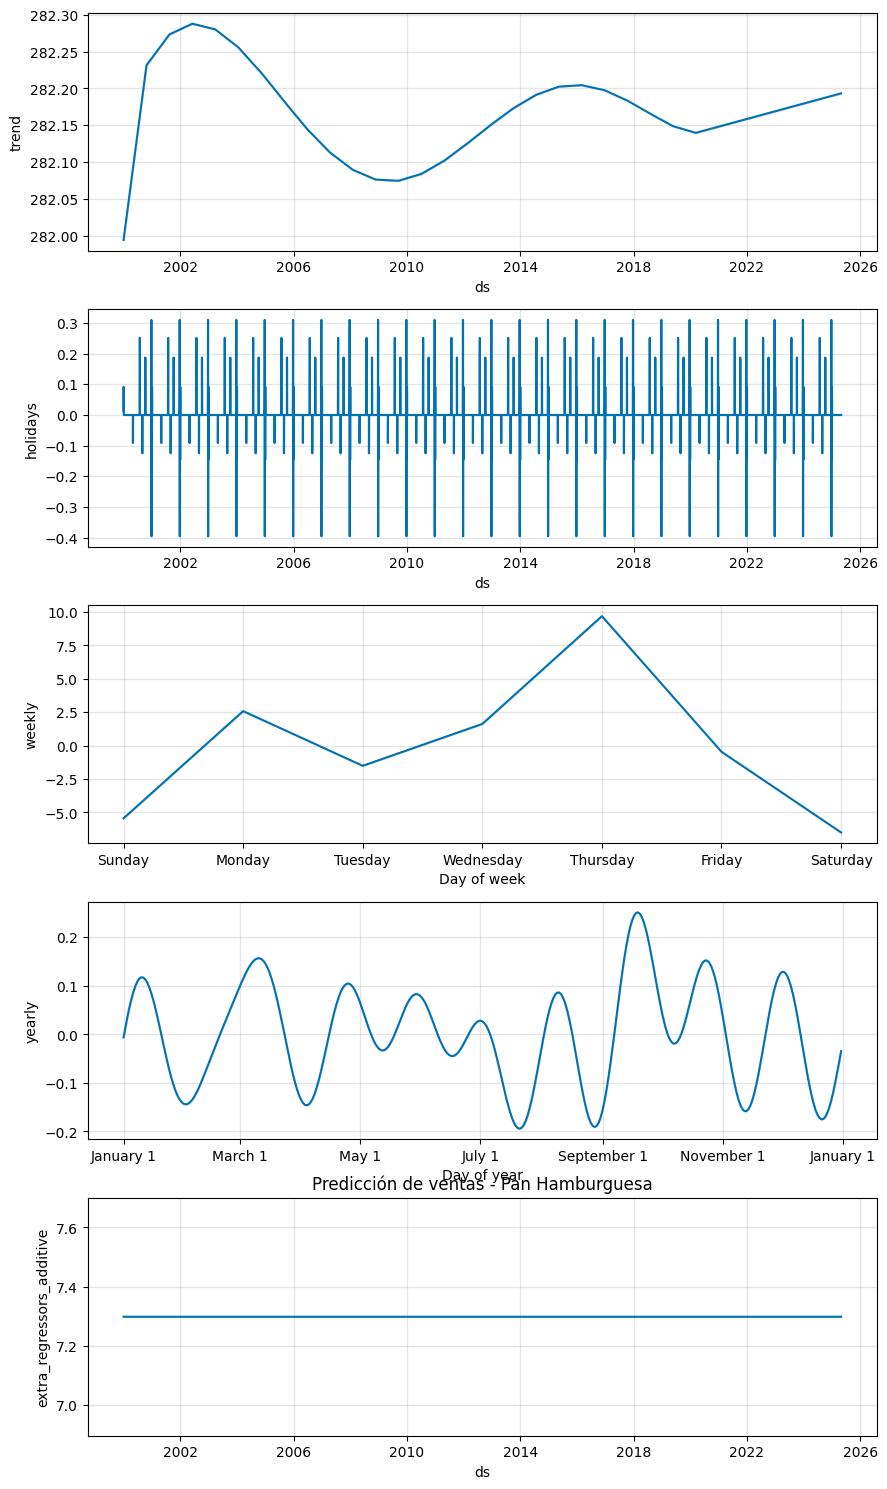

  0%|          | 0/3 [00:00<?, ?it/s]19:17:55 - cmdstanpy - INFO - Chain [1] start processing
19:17:55 - cmdstanpy - INFO - Chain [1] done processing
 33%|███▎      | 1/3 [00:00<00:01,  1.17it/s]19:17:55 - cmdstanpy - INFO - Chain [1] start processing
19:17:56 - cmdstanpy - INFO - Chain [1] done processing
 67%|██████▋   | 2/3 [00:01<00:00,  1.29it/s]19:17:56 - cmdstanpy - INFO - Chain [1] start processing
19:17:57 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 3/3 [00:02<00:00,  1.21it/s]
/Users/giampieermariscal/Downloads/py_2/.venv/lib/python3.13/site-packages/prophet/plot.py:546: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.

/Users/giampieermariscal/Downloads/py_2/.venv/lib/python3.13/site-packages/prophet/plot.py:547: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.



╒═════╤═══════════════════╤═════════╤═════════╤═════════╤════════════╤════════════╤════════════╤════════════╕
│     │ horizon           │     mse │    rmse │     mae │       mape │      mdape │      smape │   coverage │
╞═════╪═══════════════════╪═════════╪═════════╪═════════╪════════════╪════════════╪════════════╪════════════╡
│   0 │ 37 days 00:00:00  │ 3.81532 │ 1.95329 │ 1.68612 │ 0.00582892 │ 0.00589391 │ 0.00583739 │   0.730887 │
├─────┼───────────────────┼─────────┼─────────┼─────────┼────────────┼────────────┼────────────┼────────────┤
│   1 │ 38 days 00:00:00  │ 3.71288 │ 1.92688 │ 1.6533  │ 0.00571392 │ 0.00584378 │ 0.00572216 │   0.740061 │
├─────┼───────────────────┼─────────┼─────────┼─────────┼────────────┼────────────┼────────────┼────────────┤
│   2 │ 39 days 00:00:00  │ 3.76604 │ 1.94063 │ 1.67119 │ 0.00577472 │ 0.00586606 │ 0.00578343 │   0.733945 │
├─────┼───────────────────┼─────────┼─────────┼─────────┼────────────┼────────────┼────────────┼────────────┤
│   3 │ 40

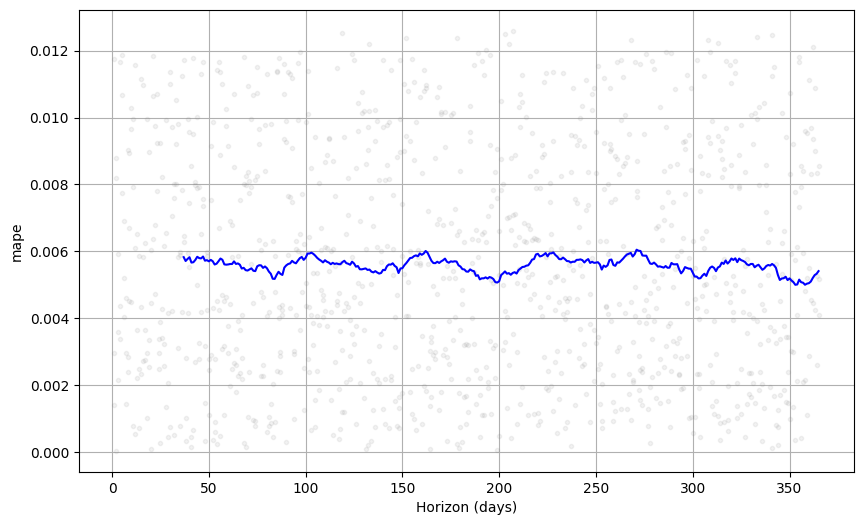

19:17:57 - cmdstanpy - INFO - Chain [1] start processing
19:17:58 - cmdstanpy - INFO - Chain [1] done processing



📈 Predicción para Cachito


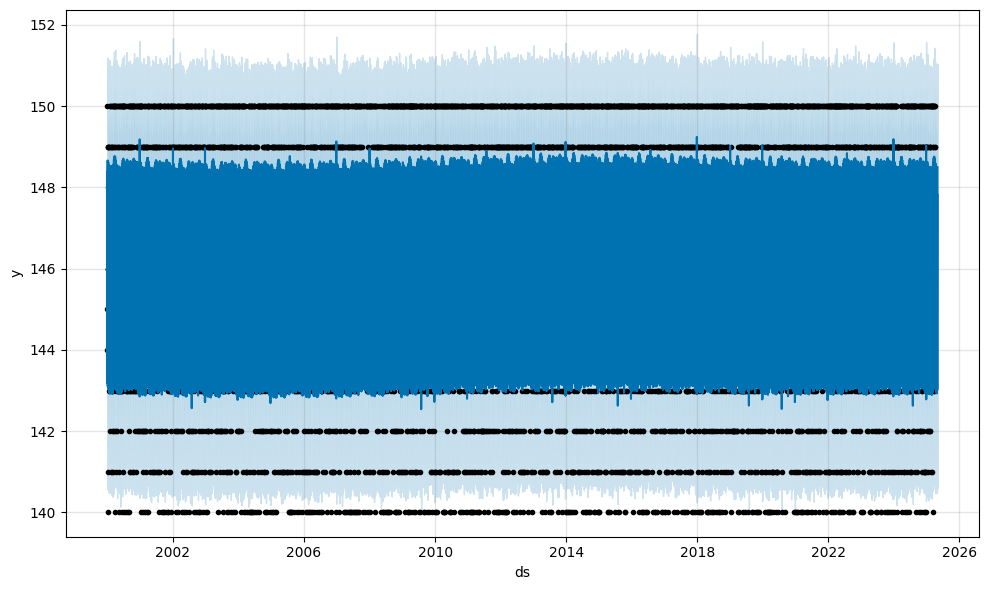

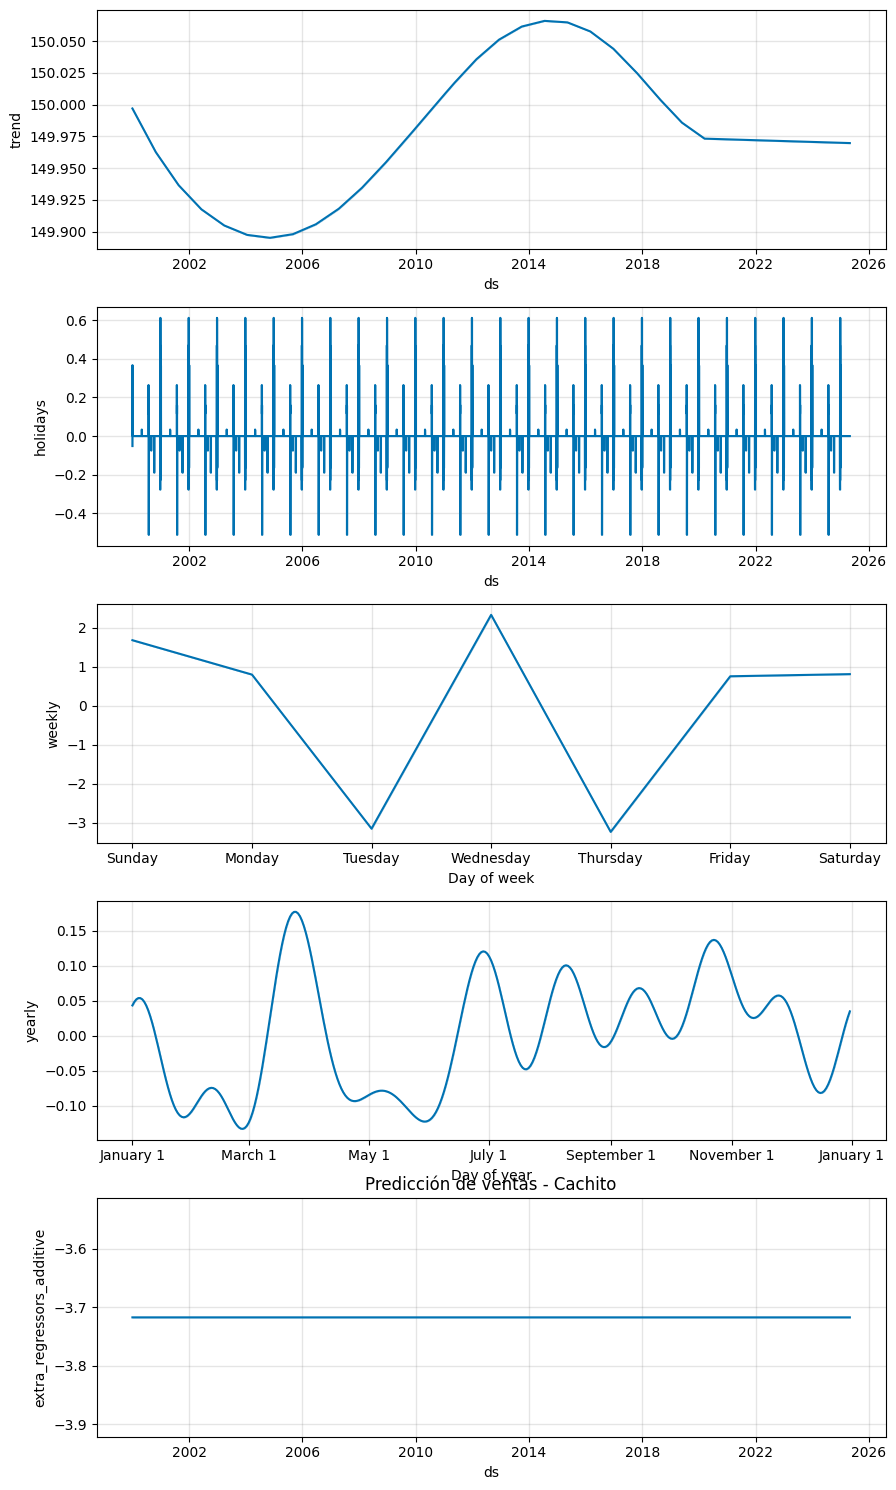

  0%|          | 0/3 [00:00<?, ?it/s]19:17:59 - cmdstanpy - INFO - Chain [1] start processing
19:18:00 - cmdstanpy - INFO - Chain [1] done processing
 33%|███▎      | 1/3 [00:00<00:01,  1.42it/s]19:18:00 - cmdstanpy - INFO - Chain [1] start processing
19:18:01 - cmdstanpy - INFO - Chain [1] done processing
 67%|██████▋   | 2/3 [00:01<00:00,  1.28it/s]19:18:01 - cmdstanpy - INFO - Chain [1] start processing
19:18:02 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 3/3 [00:02<00:00,  1.12it/s]
/Users/giampieermariscal/Downloads/py_2/.venv/lib/python3.13/site-packages/prophet/plot.py:546: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.

/Users/giampieermariscal/Downloads/py_2/.venv/lib/python3.13/site-packages/prophet/plot.py:547: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.



╒═════╤═══════════════════╤═════════╤═════════╤═════════╤═══════════╤════════════╤═══════════╤════════════╕
│     │ horizon           │     mse │    rmse │     mae │      mape │      mdape │     smape │   coverage │
╞═════╪═══════════════════╪═════════╪═════════╪═════════╪═══════════╪════════════╪═══════════╪════════════╡
│   0 │ 37 days 00:00:00  │ 3.71077 │ 1.92634 │ 1.65266 │ 0.0113337 │ 0.0117128  │ 0.0113254 │   0.75841  │
├─────┼───────────────────┼─────────┼─────────┼─────────┼───────────┼────────────┼───────────┼────────────┤
│   1 │ 38 days 00:00:00  │ 3.61795 │ 1.90209 │ 1.62514 │ 0.0111441 │ 0.00982166 │ 0.0111354 │   0.767584 │
├─────┼───────────────────┼─────────┼─────────┼─────────┼───────────┼────────────┼───────────┼────────────┤
│   2 │ 39 days 00:00:00  │ 3.71448 │ 1.9273  │ 1.64674 │ 0.0113048 │ 0.0114881  │ 0.0112942 │   0.752294 │
├─────┼───────────────────┼─────────┼─────────┼─────────┼───────────┼────────────┼───────────┼────────────┤
│   3 │ 40 days 00:00:00  │ 

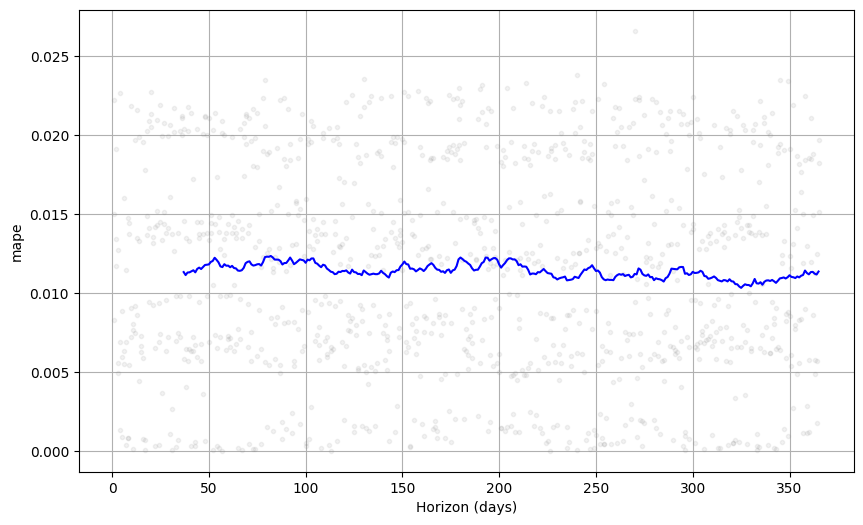

19:18:02 - cmdstanpy - INFO - Chain [1] start processing
19:18:03 - cmdstanpy - INFO - Chain [1] done processing



📈 Predicción para Pan Manjar


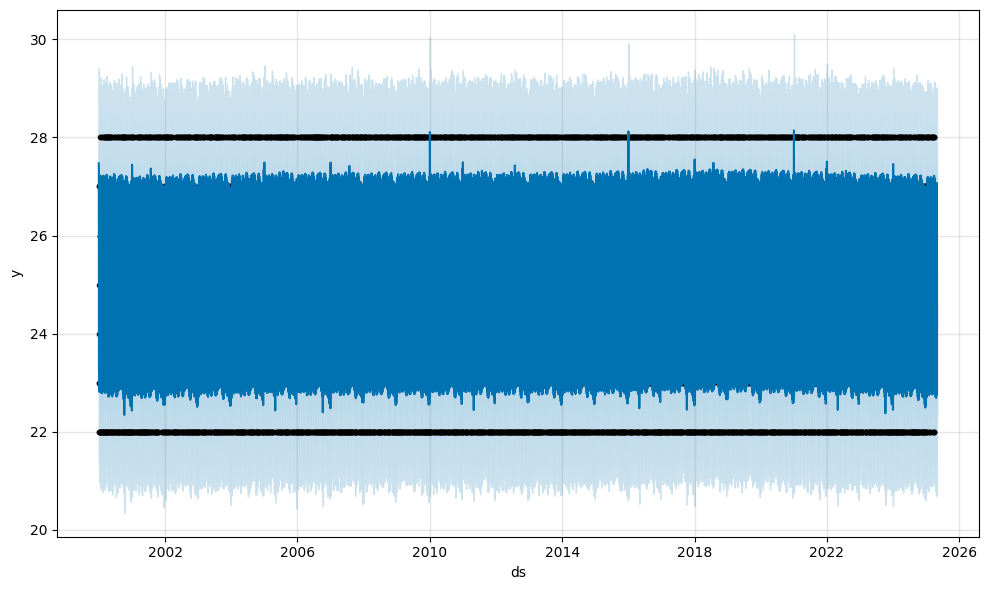

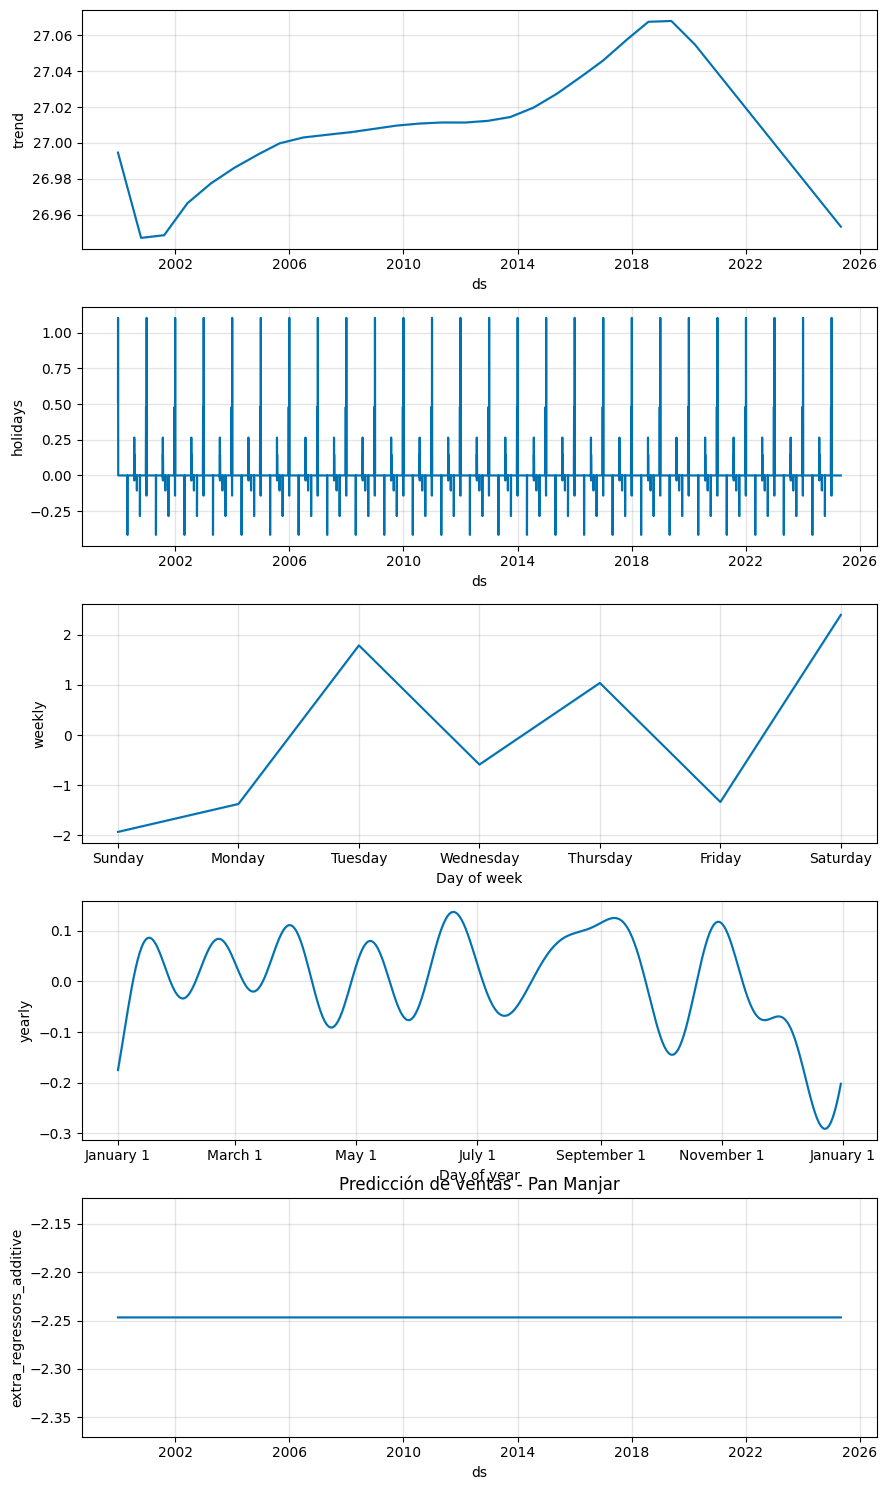

  0%|          | 0/3 [00:00<?, ?it/s]19:18:05 - cmdstanpy - INFO - Chain [1] start processing
19:18:06 - cmdstanpy - INFO - Chain [1] done processing
 33%|███▎      | 1/3 [00:01<00:02,  1.06s/it]19:18:06 - cmdstanpy - INFO - Chain [1] start processing
19:18:07 - cmdstanpy - INFO - Chain [1] done processing
 67%|██████▋   | 2/3 [00:02<00:01,  1.12s/it]19:18:07 - cmdstanpy - INFO - Chain [1] start processing
19:18:08 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 3/3 [00:03<00:00,  1.09s/it]
/Users/giampieermariscal/Downloads/py_2/.venv/lib/python3.13/site-packages/prophet/plot.py:546: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.

/Users/giampieermariscal/Downloads/py_2/.venv/lib/python3.13/site-packages/prophet/plot.py:547: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.



╒═════╤═══════════════════╤═════════╤═════════╤═════════╤═══════════╤═══════════╤═══════════╤════════════╕
│     │ horizon           │     mse │    rmse │     mae │      mape │     mdape │     smape │   coverage │
╞═════╪═══════════════════╪═════════╪═════════╪═════════╪═══════════╪═══════════╪═══════════╪════════════╡
│   0 │ 37 days 00:00:00  │ 1.76889 │ 1.33    │ 1.18278 │ 0.0483433 │ 0.044004  │ 0.0481015 │   0.859327 │
├─────┼───────────────────┼─────────┼─────────┼─────────┼───────────┼───────────┼───────────┼────────────┤
│   1 │ 38 days 00:00:00  │ 1.75518 │ 1.32483 │ 1.17459 │ 0.0480173 │ 0.0427894 │ 0.0477791 │   0.862385 │
├─────┼───────────────────┼─────────┼─────────┼─────────┼───────────┼───────────┼───────────┼────────────┤
│   2 │ 39 days 00:00:00  │ 1.75257 │ 1.32385 │ 1.16981 │ 0.0477859 │ 0.0434873 │ 0.0475425 │   0.862385 │
├─────┼───────────────────┼─────────┼─────────┼─────────┼───────────┼───────────┼───────────┼────────────┤
│   3 │ 40 days 00:00:00  │ 1.78162 │

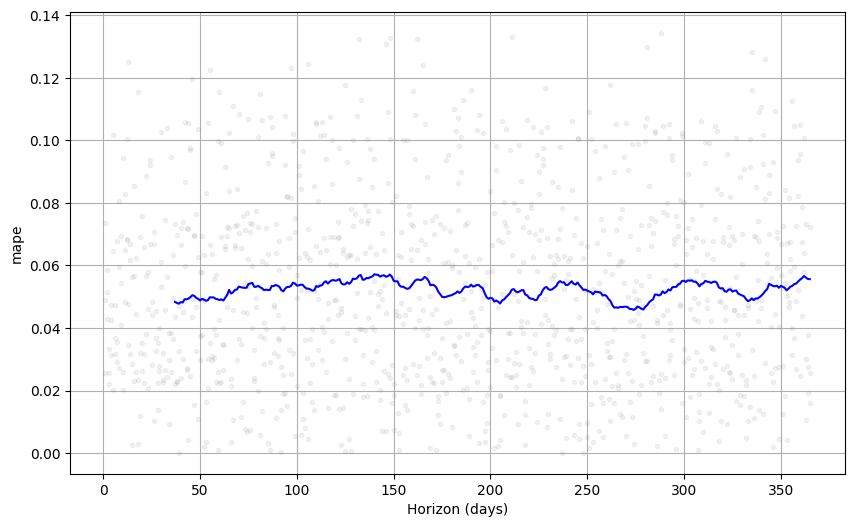

19:18:08 - cmdstanpy - INFO - Chain [1] start processing
19:18:09 - cmdstanpy - INFO - Chain [1] done processing



📈 Predicción para Leche


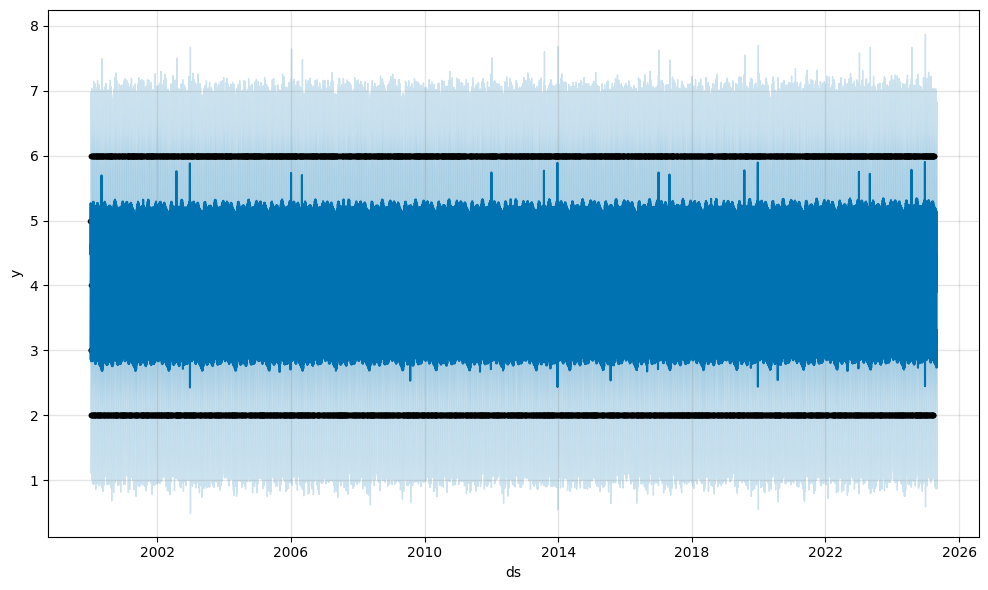

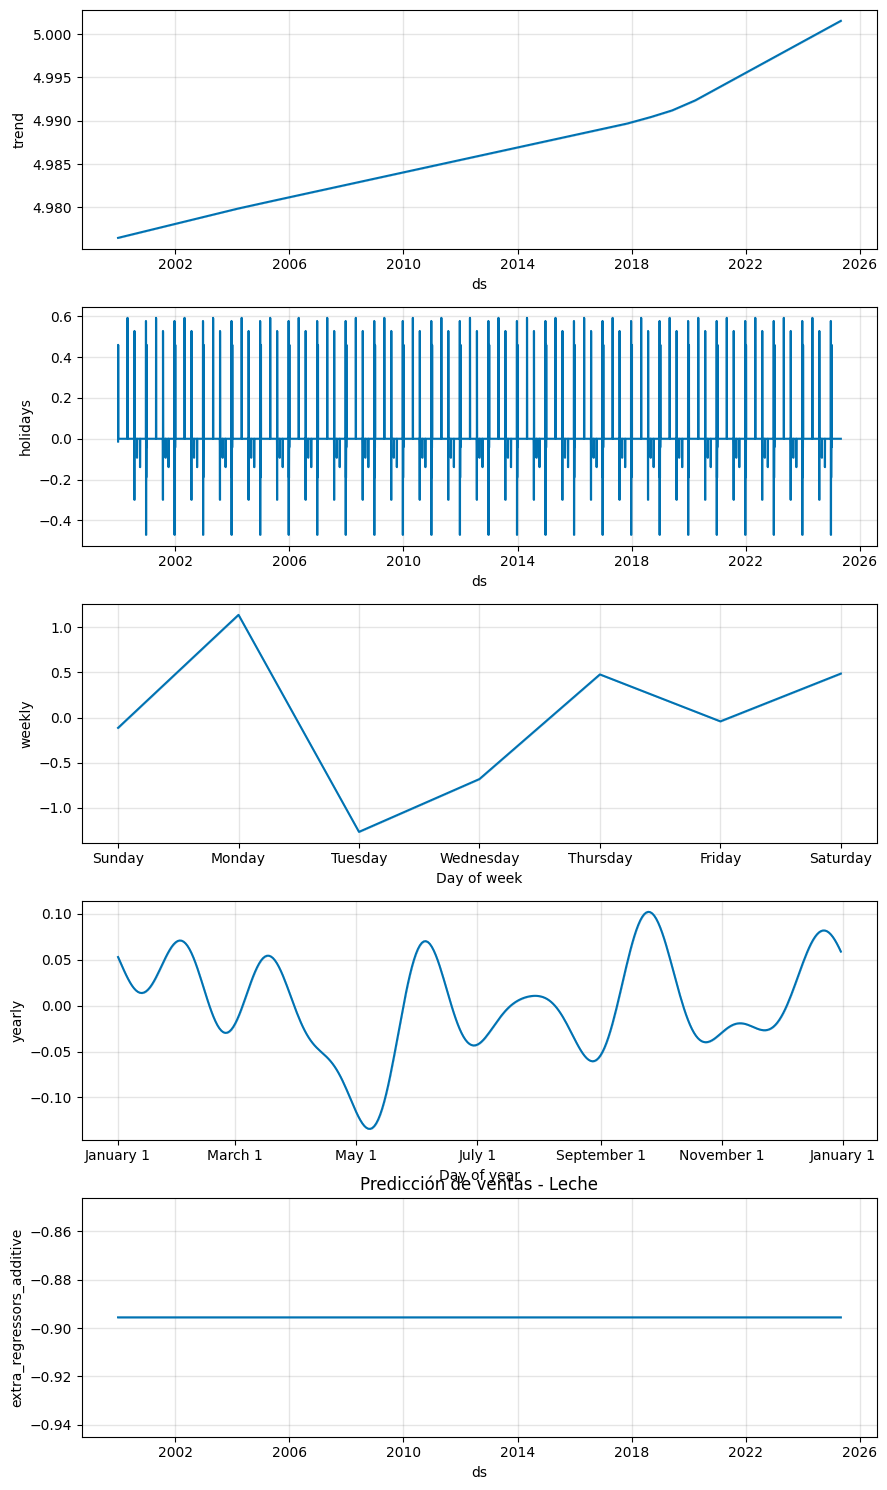

  0%|          | 0/3 [00:00<?, ?it/s]19:18:11 - cmdstanpy - INFO - Chain [1] start processing
19:18:11 - cmdstanpy - INFO - Chain [1] done processing
 33%|███▎      | 1/3 [00:00<00:01,  1.26it/s]19:18:12 - cmdstanpy - INFO - Chain [1] start processing
19:18:12 - cmdstanpy - INFO - Chain [1] done processing
 67%|██████▋   | 2/3 [00:02<00:01,  1.05s/it]19:18:13 - cmdstanpy - INFO - Chain [1] start processing
19:18:13 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 3/3 [00:02<00:00,  1.03it/s]
/Users/giampieermariscal/Downloads/py_2/.venv/lib/python3.13/site-packages/prophet/plot.py:546: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.

/Users/giampieermariscal/Downloads/py_2/.venv/lib/python3.13/site-packages/prophet/plot.py:547: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.



╒═════╤═══════════════════╤═════════╤═════════╤═════════╤══════════╤══════════╤══════════╤════════════╕
│     │ horizon           │     mse │    rmse │     mae │     mape │    mdape │    smape │   coverage │
╞═════╪═══════════════════╪═════════╪═════════╪═════════╪══════════╪══════════╪══════════╪════════════╡
│   0 │ 37 days 00:00:00  │ 2.01212 │ 1.41849 │ 1.27703 │ 0.416286 │ 0.334697 │ 0.347724 │   0.779817 │
├─────┼───────────────────┼─────────┼─────────┼─────────┼──────────┼──────────┼──────────┼────────────┤
│   1 │ 38 days 00:00:00  │ 2.03395 │ 1.42617 │ 1.28507 │ 0.418938 │ 0.334697 │ 0.349164 │   0.776758 │
├─────┼───────────────────┼─────────┼─────────┼─────────┼──────────┼──────────┼──────────┼────────────┤
│   2 │ 39 days 00:00:00  │ 2.08728 │ 1.44474 │ 1.30652 │ 0.42027  │ 0.334697 │ 0.353476 │   0.770642 │
├─────┼───────────────────┼─────────┼─────────┼─────────┼──────────┼──────────┼──────────┼────────────┤
│   3 │ 40 days 00:00:00  │ 2.08468 │ 1.44384 │ 1.30693 │ 0.4207

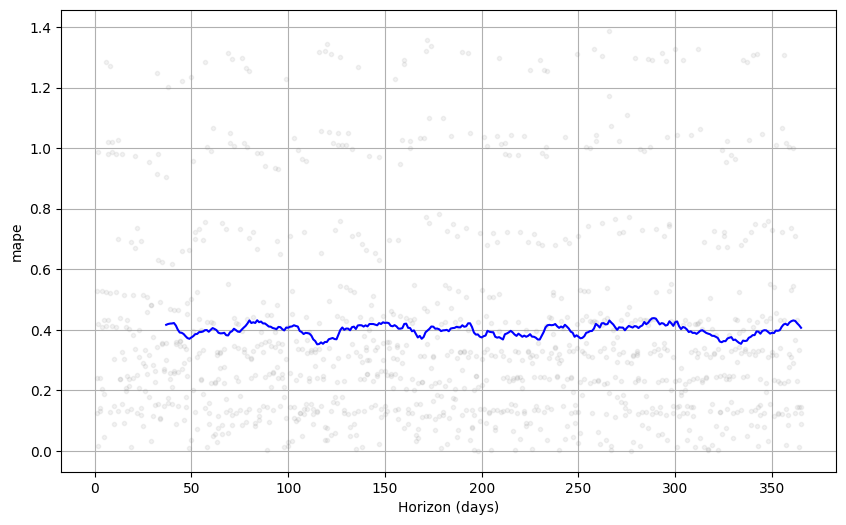

19:18:14 - cmdstanpy - INFO - Chain [1] start processing
19:18:15 - cmdstanpy - INFO - Chain [1] done processing



📈 Predicción para Jamon


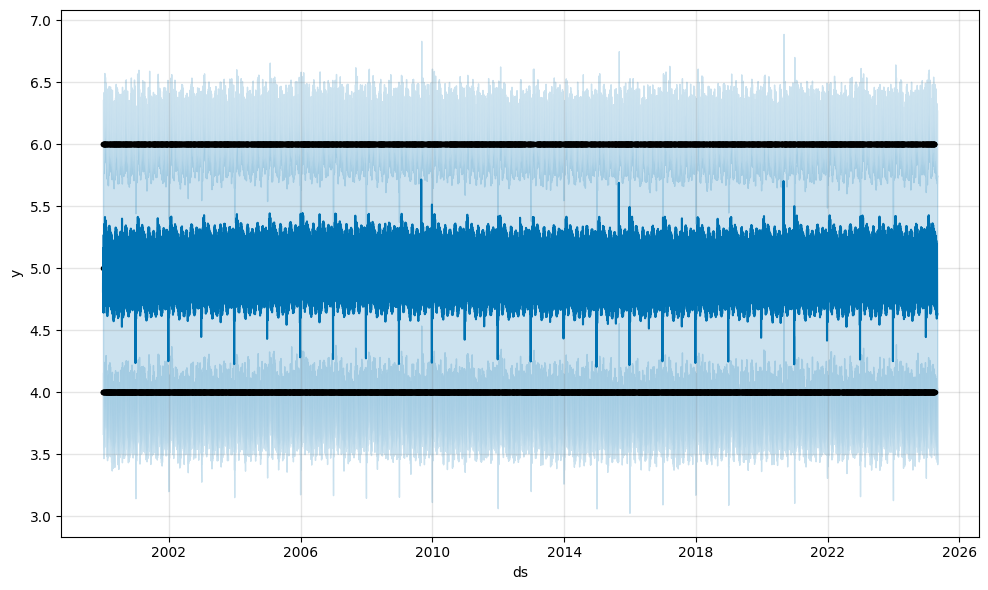

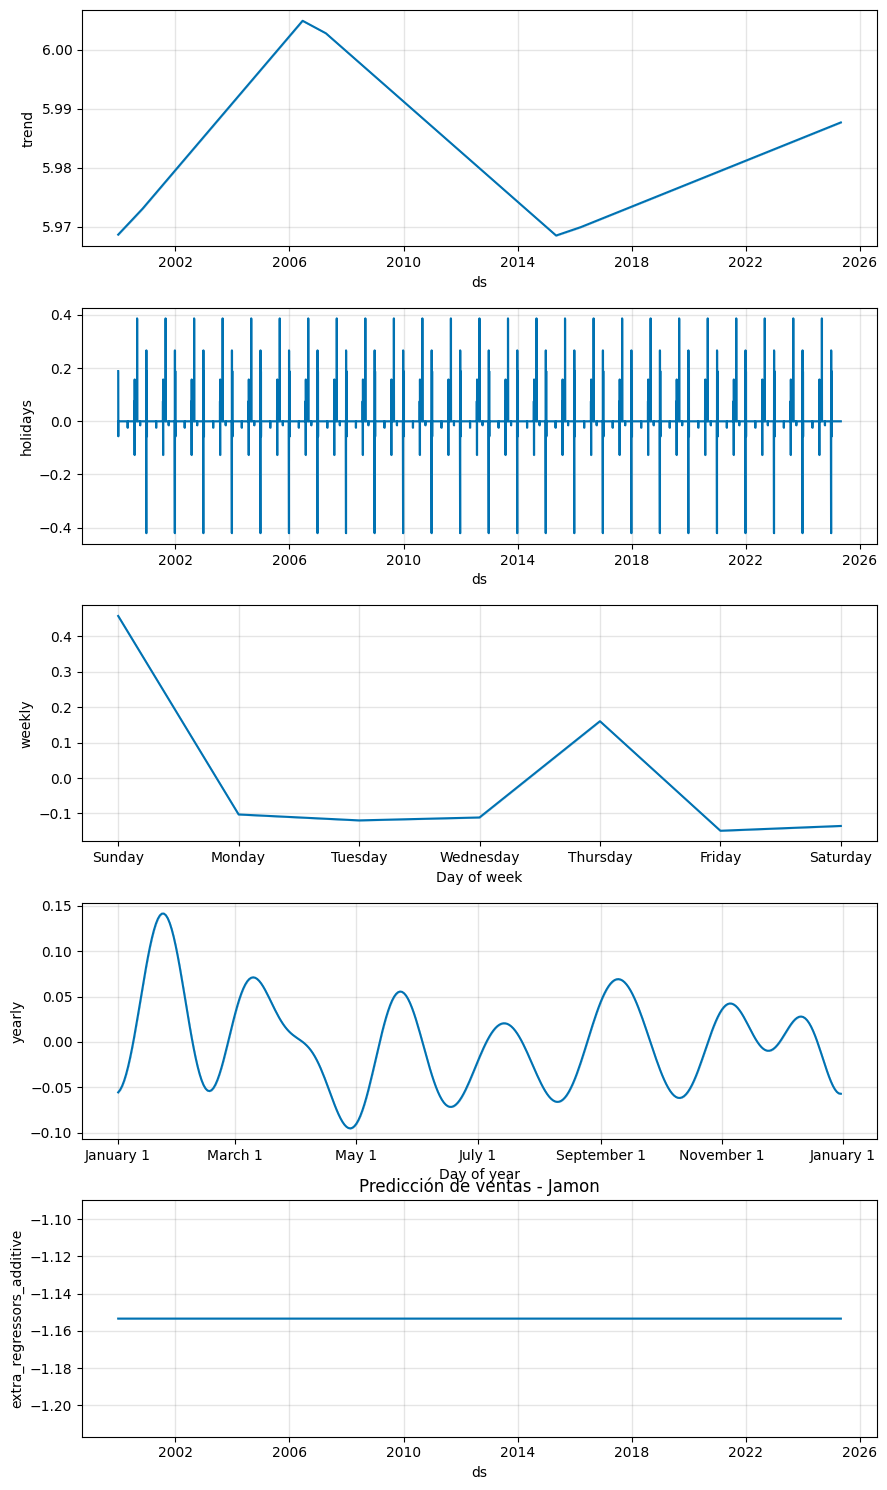

  0%|          | 0/3 [00:00<?, ?it/s]19:18:17 - cmdstanpy - INFO - Chain [1] start processing
19:18:17 - cmdstanpy - INFO - Chain [1] done processing
 33%|███▎      | 1/3 [00:01<00:02,  1.26s/it]19:18:18 - cmdstanpy - INFO - Chain [1] start processing
19:18:19 - cmdstanpy - INFO - Chain [1] done processing
 67%|██████▋   | 2/3 [00:02<00:01,  1.29s/it]19:18:19 - cmdstanpy - INFO - Chain [1] start processing
19:18:20 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 3/3 [00:03<00:00,  1.30s/it]
/Users/giampieermariscal/Downloads/py_2/.venv/lib/python3.13/site-packages/prophet/plot.py:546: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.

/Users/giampieermariscal/Downloads/py_2/.venv/lib/python3.13/site-packages/prophet/plot.py:547: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.



╒═════╤═══════════════════╤══════════╤══════════╤══════════╤══════════╤══════════╤══════════╤════════════╕
│     │ horizon           │      mse │     rmse │      mae │     mape │    mdape │    smape │   coverage │
╞═════╪═══════════════════╪══════════╪══════════╪══════════╪══════════╪══════════╪══════════╪════════════╡
│   0 │ 37 days 00:00:00  │ 0.853164 │ 0.923669 │ 0.839834 │ 0.166844 │ 0.164031 │ 0.170251 │   0.706422 │
├─────┼───────────────────┼──────────┼──────────┼──────────┼──────────┼──────────┼──────────┼────────────┤
│   1 │ 38 days 00:00:00  │ 0.846341 │ 0.919968 │ 0.833913 │ 0.165921 │ 0.16394  │ 0.16923  │   0.706422 │
├─────┼───────────────────┼──────────┼──────────┼──────────┼──────────┼──────────┼──────────┼────────────┤
│   2 │ 39 days 00:00:00  │ 0.839451 │ 0.916215 │ 0.831367 │ 0.167555 │ 0.164031 │ 0.16958  │   0.715596 │
├─────┼───────────────────┼──────────┼──────────┼──────────┼──────────┼──────────┼──────────┼────────────┤
│   3 │ 40 days 00:00:00  │ 0.816679 

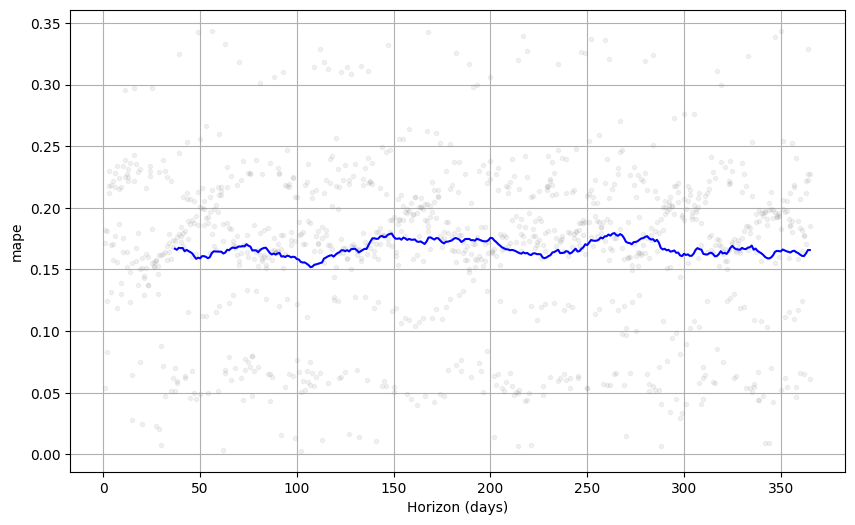

19:18:21 - cmdstanpy - INFO - Chain [1] start processing
19:18:21 - cmdstanpy - INFO - Chain [1] done processing



📈 Predicción para Café


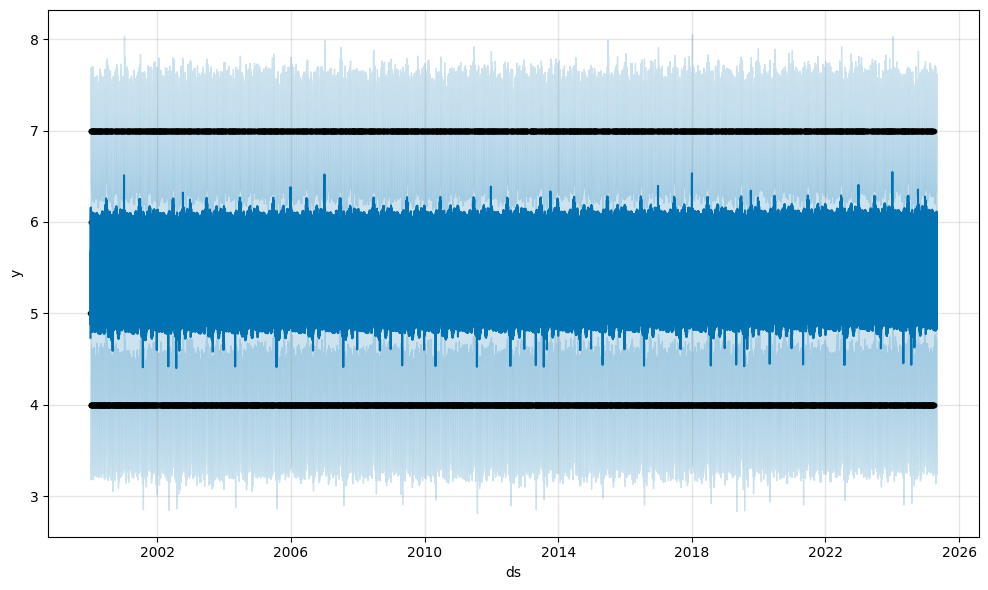

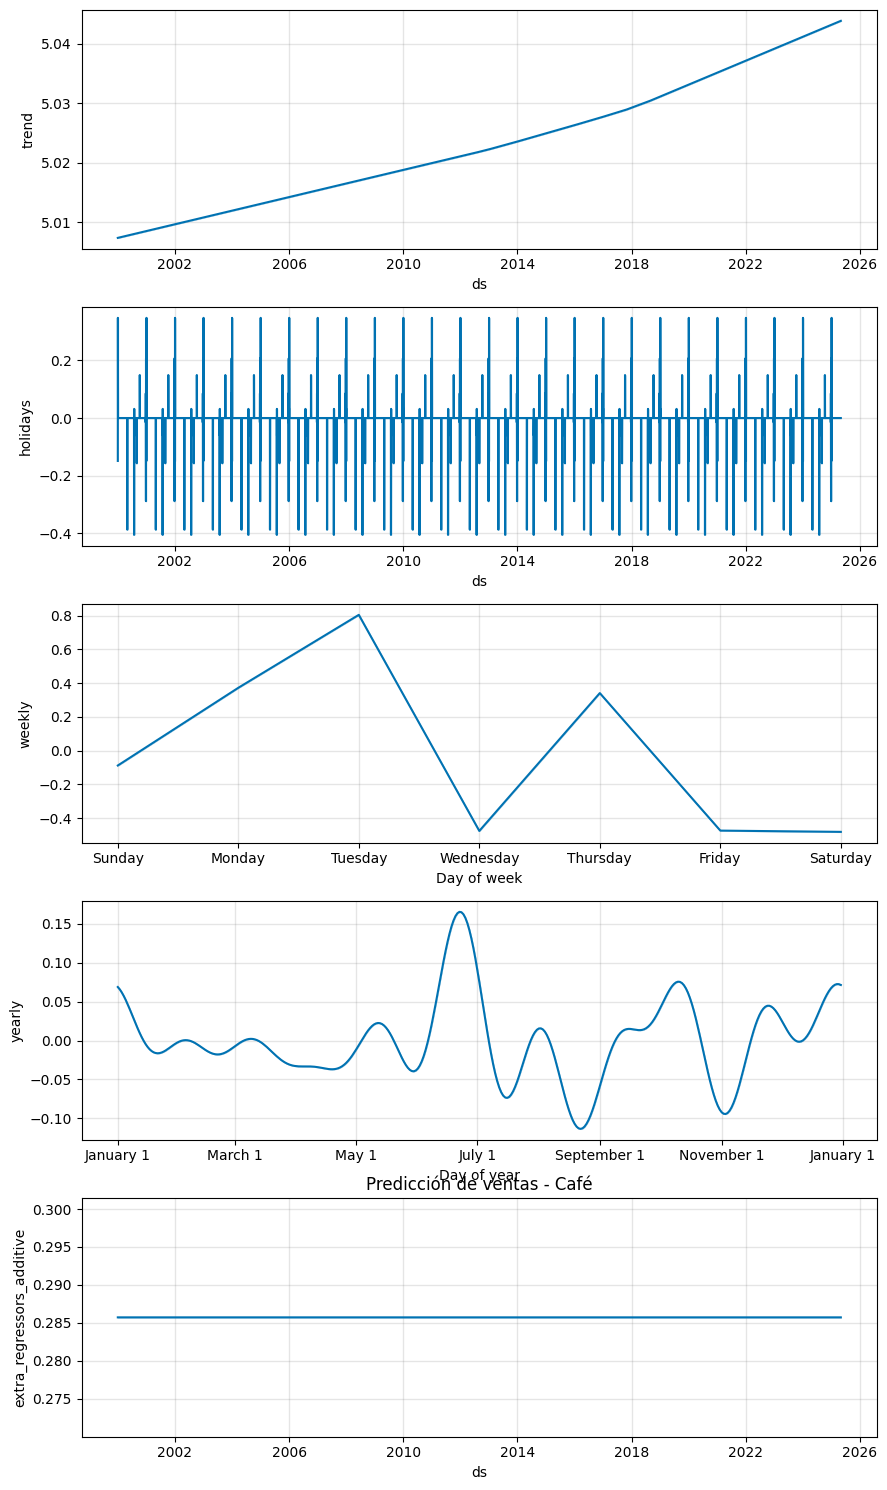

  0%|          | 0/3 [00:00<?, ?it/s]19:18:23 - cmdstanpy - INFO - Chain [1] start processing
19:18:24 - cmdstanpy - INFO - Chain [1] done processing
 33%|███▎      | 1/3 [00:00<00:01,  1.07it/s]19:18:24 - cmdstanpy - INFO - Chain [1] start processing
19:18:24 - cmdstanpy - INFO - Chain [1] done processing
 67%|██████▋   | 2/3 [00:01<00:00,  1.08it/s]19:18:25 - cmdstanpy - INFO - Chain [1] start processing
19:18:25 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 3/3 [00:02<00:00,  1.09it/s]
/Users/giampieermariscal/Downloads/py_2/.venv/lib/python3.13/site-packages/prophet/plot.py:546: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.

/Users/giampieermariscal/Downloads/py_2/.venv/lib/python3.13/site-packages/prophet/plot.py:547: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.



╒═════╤═══════════════════╤═════════╤═════════╤══════════╤══════════╤══════════╤══════════╤════════════╕
│     │ horizon           │     mse │    rmse │      mae │     mape │    mdape │    smape │   coverage │
╞═════╪═══════════════════╪═════════╪═════════╪══════════╪══════════╪══════════╪══════════╪════════════╡
│   0 │ 37 days 00:00:00  │ 1.62394 │ 1.27434 │ 1.14306  │ 0.217188 │ 0.199675 │ 0.212788 │   0.755352 │
├─────┼───────────────────┼─────────┼─────────┼──────────┼──────────┼──────────┼──────────┼────────────┤
│   1 │ 38 days 00:00:00  │ 1.64642 │ 1.28313 │ 1.14615  │ 0.216101 │ 0.199675 │ 0.212623 │   0.752294 │
├─────┼───────────────────┼─────────┼─────────┼──────────┼──────────┼──────────┼──────────┼────────────┤
│   2 │ 39 days 00:00:00  │ 1.68247 │ 1.2971  │ 1.1583   │ 0.218905 │ 0.199675 │ 0.214643 │   0.743119 │
├─────┼───────────────────┼─────────┼─────────┼──────────┼──────────┼──────────┼──────────┼────────────┤
│   3 │ 40 days 00:00:00  │ 1.68117 │ 1.2966  │ 1.15805

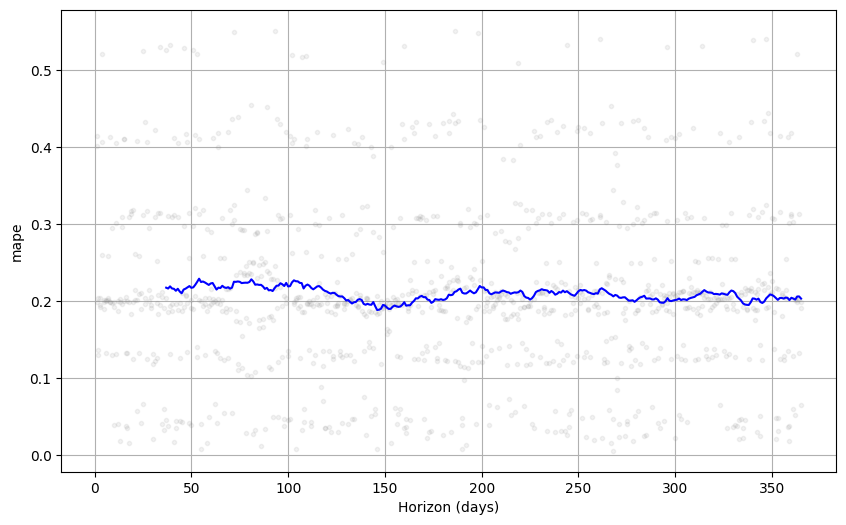

19:18:26 - cmdstanpy - INFO - Chain [1] start processing
19:18:26 - cmdstanpy - INFO - Chain [1] done processing



📈 Predicción para Queso


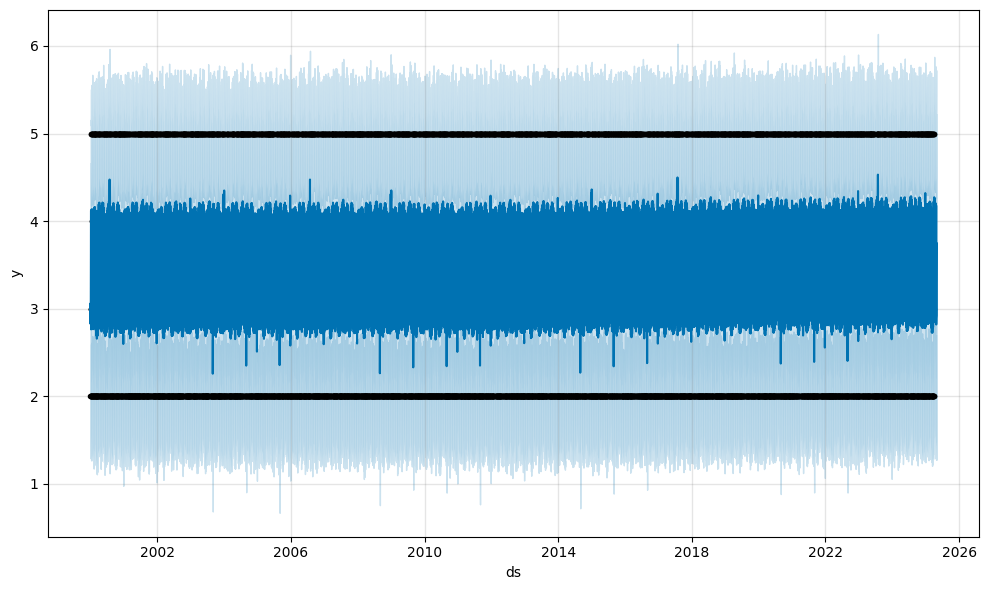

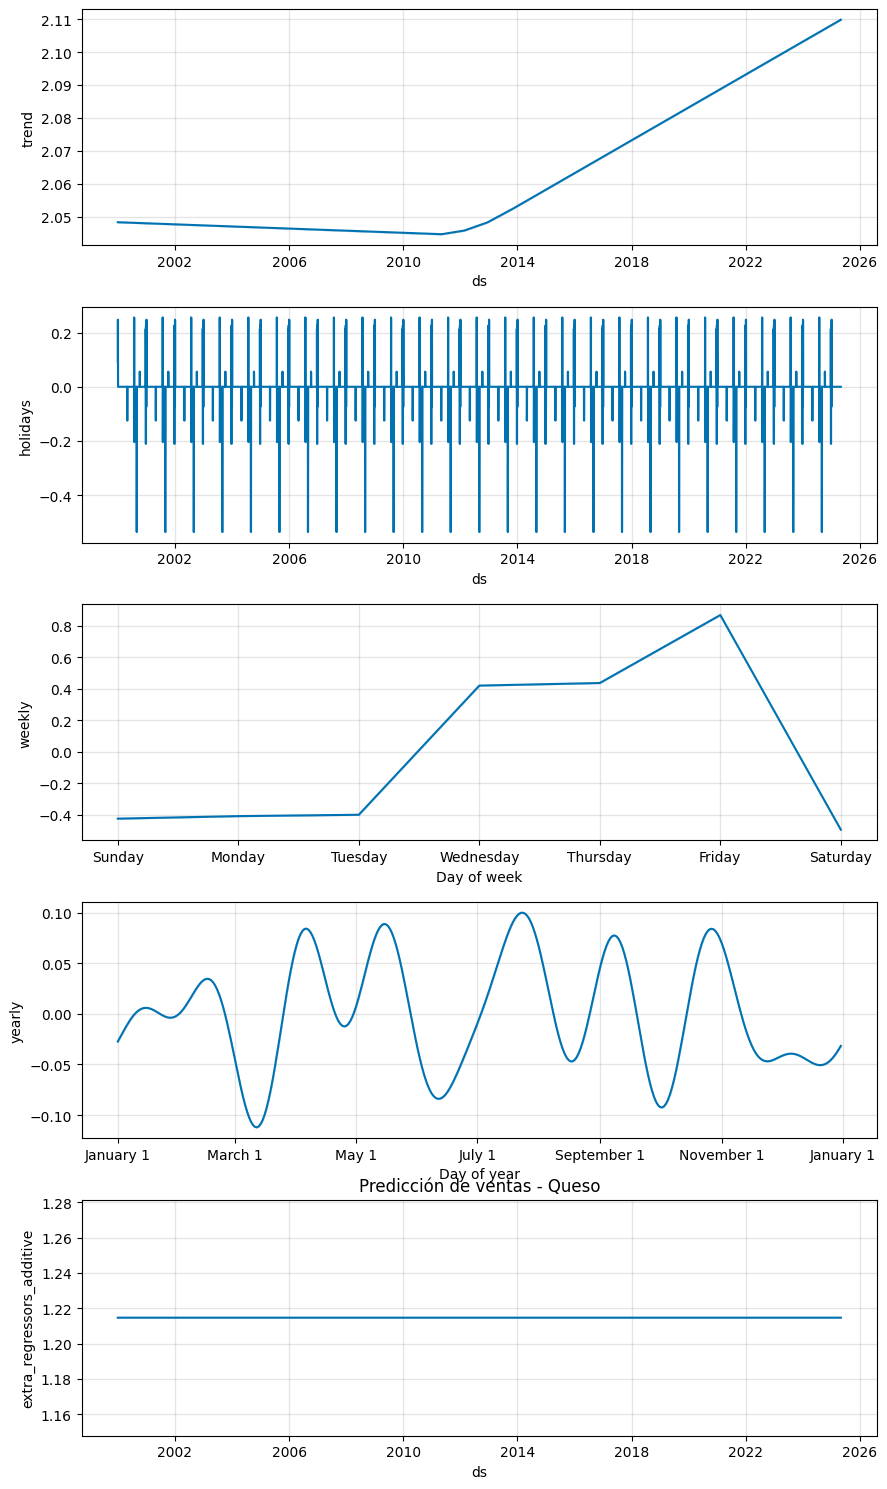

  0%|          | 0/3 [00:00<?, ?it/s]19:18:28 - cmdstanpy - INFO - Chain [1] start processing
19:18:29 - cmdstanpy - INFO - Chain [1] done processing
 33%|███▎      | 1/3 [00:00<00:01,  1.04it/s]19:18:29 - cmdstanpy - INFO - Chain [1] start processing
19:18:30 - cmdstanpy - INFO - Chain [1] done processing
 67%|██████▋   | 2/3 [00:02<00:01,  1.10s/it]19:18:30 - cmdstanpy - INFO - Chain [1] start processing
19:18:30 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 3/3 [00:02<00:00,  1.04it/s]
/Users/giampieermariscal/Downloads/py_2/.venv/lib/python3.13/site-packages/prophet/plot.py:546: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.

/Users/giampieermariscal/Downloads/py_2/.venv/lib/python3.13/site-packages/prophet/plot.py:547: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.



╒═════╤═══════════════════╤═════════╤═════════╤══════════╤══════════╤══════════╤══════════╤════════════╕
│     │ horizon           │     mse │    rmse │      mae │     mape │    mdape │    smape │   coverage │
╞═════╪═══════════════════╪═════════╪═════════╪══════════╪══════════╪══════════╪══════════╪════════════╡
│   0 │ 37 days 00:00:00  │ 1.36889 │ 1.17    │ 1.03825  │ 0.365468 │ 0.396561 │ 0.323798 │   0.816514 │
├─────┼───────────────────┼─────────┼─────────┼──────────┼──────────┼──────────┼──────────┼────────────┤
│   1 │ 38 days 00:00:00  │ 1.42059 │ 1.19188 │ 1.05604  │ 0.371146 │ 0.399383 │ 0.328687 │   0.798165 │
├─────┼───────────────────┼─────────┼─────────┼──────────┼──────────┼──────────┼──────────┼────────────┤
│   2 │ 39 days 00:00:00  │ 1.36839 │ 1.16978 │ 1.02665  │ 0.35953  │ 0.299882 │ 0.318962 │   0.810398 │
├─────┼───────────────────┼─────────┼─────────┼──────────┼──────────┼──────────┼──────────┼────────────┤
│   3 │ 40 days 00:00:00  │ 1.36749 │ 1.1694  │ 1.02659

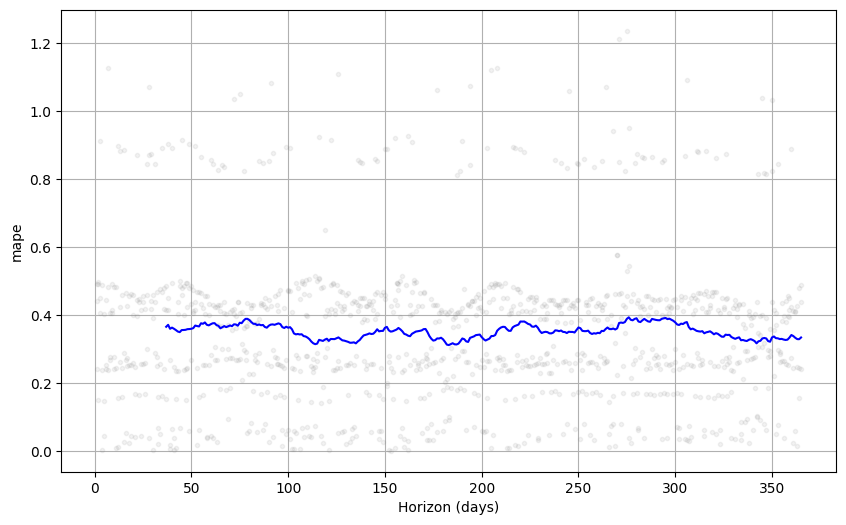

In [ ]:
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_cross_validation_metric
import plotly.graph_objects as go
from tabulate import tabulate

# --------------------------
# Cargar el CSV local de ventas
# --------------------------
productos_csv = 'ventas_panes_2000_2025.csv'
df = pd.read_csv(productos_csv)


# --------------------------
# Cargar el CSV local de feriados del año: regressor
# --------------------------
feriados_csv = 'rango_feriados.csv'
csv_feriados = pd.read_csv(feriados_csv)


# Asegurar nombres de columnas consistentes
df.columns = df.columns.str.strip().str.lower()
df.rename(columns={
    'fecha': 'ds',
    'ventas': 'y'
}, inplace=True)

# Convertir fecha a datetime
df['ds'] = pd.to_datetime(df['ds'])
data = []
for _, feriado in csv_feriados.iterrows():
    data.append({  
        'holiday': feriado['description'],
        'ds': pd.to_datetime(feriado['date']),
        'lower_window': feriado['lower_window'],
        'upper_window': feriado['upper_window']
    })

# Crear DataFrame con los feriados
feriados = pd.DataFrame(data)


# --------------------------
# Modelo Prophet por producto
# --------------------------
productos = df['producto'].unique()
modelos = {}
predicciones = {}

for prod in productos:
    df_prod = df[df['producto'] == prod].copy()
    modelo = Prophet(holidays=feriados)
    modelo.add_regressor('precio')
    modelo.add_regressor('stock')
    modelo.fit(df_prod)

    # Fechas futuras x 30 dias
    futuro = modelo.make_future_dataframe(periods=30*12)
    futuro = futuro.merge(df_prod[['ds', 'precio', 'stock']], on='ds', how='left')

    # Completar valores futuros con medias si faltan
    for col in ['precio', 'stock']:
        if futuro[col].isnull().any():
            futuro[col] = futuro[col].fillna(df_prod[col].mean())

    # Predicción
    forecast = modelo.predict(futuro)
    modelos[prod] = modelo
    predicciones[prod] = forecast

    # Gráfico
    print(f"\n📈 Predicción para {prod}")
    modelo.plot(forecast)
    modelo.plot_components(forecast)
    plt.title(f'Predicción de ventas - {prod}')
    plt.show()


    #cross validation
    # Validación cruzada: cada 730 días de historico, predice los siguientes 365
    df_cv = cross_validation(modelo,
                         initial='7300 days',
                         period='730 days',
                         horizon='365 days')  
    df_p = performance_metrics(df_cv)
    # tabla de métricas
    print(tabulate(df_p, headers='keys', tablefmt='fancy_grid'))
    plot_cross_validation_metric(df_cv, metric='mape')
    plt.show()




In [59]:
import pandas as pd

# Rango de años
anios = range(2000, 2026)

# Feriados
feriados_config = {
    "Año Nuevo": {"fecha": "-01-01", "lower": -1, "upper": 1},
    "Día del Trabajo": {"fecha": "-05-01", "lower": 0, "upper": 0},
    "Fiestas Patrias 1": {"fecha": "-07-28", "lower": -1, "upper": 2},
    "Santa Rosa de Lima": {"fecha": "-08-30", "lower": 0, "upper": 0},
    "Batalla de Angamos": {"fecha": "-10-08", "lower": 0, "upper": 0},
    "Navidad": {"fecha": "-12-25", "lower": -2, "upper": 2}
}


# Generar registros
datos = []
for anio in anios:
    for nombre, info in feriados_config.items():
        fecha = f"{anio}{info['fecha']}"
        datos.append({
            "description": nombre,
            "date": fecha,
            "lower_window": info["lower"],
            "upper_window": info["upper"]
        })

# Crear DataFrame
df_feriados = pd.DataFrame(datos)
df_feriados['date'] = pd.to_datetime(df_feriados['date'])

# Guardar a CSV
df_feriados.to_csv("rango_feriados.csv", index=False)
print("✅ Archivo 'rango_feriados.csv' creado con éxito.")

✅ Archivo 'rango_feriados.csv' creado con éxito.


In [99]:
import random
import datetime
import openpyxl
import csv
from openpyxl.styles import Font

try:
    from google.colab import files
    en_colab = True
except ImportError:
    en_colab = False

# Diccionario para traducir los días de la semana al español
dias_semana_es = {
    'Monday': 'Lunes',
    'Tuesday': 'Martes',
    'Wednesday': 'Miércoles',
    'Thursday': 'Jueves',
    'Friday': 'Viernes',
    'Saturday': 'Sábado',
    'Sunday': 'Domingo'
}

def generar_ventas_excel(fecha_inicio, fecha_fin, nombre_archivo_excel='ventas_panes_3_meses.xlsx', nombre_archivo_csv='ventas_panes_3_meses.csv'):
    # Crear libro de Excel
    wb = openpyxl.Workbook()
    ws = wb.active
    ws.title = "Ventas Diarias"

    # Encabezados
    encabezados = ['fecha', 'producto', 'precio', 'stock',
                   'ventas', 'Día de la Semana', 'Estacionalidad (Festivo)']
    ws.append(encabezados)

    for col in range(1, len(encabezados) + 1):
        ws.cell(row=1, column=col).font = Font(bold=True)

    # Lista de productos
    productos = [
        'Pan Chabatta', 'Pan Francés', 'Pan Yema Largo', 'Pan Yema Redondo',
        'Pan Chapla', 'Pan Coliza', 'Pan Integral', 'Pan Caracol',
        'Pan Hamburguesa', 'Cachito', 'Pan Manjar', 'Leche',
        'Jamon', 'Café', 'Queso'
    ]

    # Precio promedio
    precios = {
        'Pan Chabatta': 0.25,
        'Pan Francés': 0.25,
        'Pan Yema Largo': 0.25,
        'Pan Yema Redondo': 0.25,
        'Pan Chapla': 0.25,
        'Pan Coliza': 0.25,
        'Pan Integral': 0.25,
        'Pan Caracol': 0.25,
        'Pan Hamburguesa': 0.4,
        'Cachito': 0.25,
        'Pan Manjar': 0.3,
        'Leche': 4.0,
        'Jamon': 2.5,
        'Café': 2.0,
        'Queso': 3.0
    }

    # Inventario fijo por producto
    inventario_fijo = {
        'Pan Chabatta': 768,
        'Pan Francés': 648,
        'Pan Yema Largo': 360,
        'Pan Yema Redondo': 360,
        'Pan Chapla': 144,
        'Pan Coliza': 192,
        'Pan Integral': 144,
        'Pan Caracol': 144,
        'Pan Hamburguesa': 288,
        'Cachito': 144,
        'Pan Manjar': 24,
        'Leche': 5,
        'Jamon': 6,
        'Café': 5,
        'Queso': 4
    }

    # Rango de ventas por producto
    rangos = {
        'Pan Chabatta': (760, 780),
        'Pan Francés': (640, 660),
        'Pan Yema Largo': (350, 380),
        'Pan Yema Redondo': (350, 380),
        'Pan Chapla': (140, 150),
        'Pan Coliza': (190, 200),
        'Pan Integral': (140, 150),
        'Pan Caracol': (140, 150),
        'Pan Hamburguesa': (280, 300),
        'Cachito': (140, 150),
        'Pan Manjar': (22, 28),
        'Leche': (2, 6),
        'Jamon': (4, 6),
        'Café': (4, 7),
        'Queso': (2, 5)
    }

    # Patrón de ventas base semanal (0=Lunes, ..., 6=Domingo)
    patrones = {
        producto: [random.randint(rangos[producto][0], rangos[producto][1]) for _ in range(7)]
        for producto in productos
    }

    # Lista para exportar también en CSV
    datos_csv = [encabezados]

    # Generar datos
    fecha_actual = fecha_inicio
    while fecha_actual <= fecha_fin:
        dia_idx = fecha_actual.weekday()  # 0 a 6
        dia_semana = dias_semana_es[fecha_actual.strftime("%A")]  # <- ahora en español
        estacionalidad = 'Sí' if dia_idx in [5, 6] else 'No'

        for producto in productos:
            precio = precios[producto]
            inventario = inventario_fijo[producto]
            base_venta = patrones[producto][dia_idx]
            # Variar ventas ligeramente, sin salirse del rango definido
            venta_min, venta_max = rangos[producto]
            variacion = random.randint(-3, 3)
            ventas = min(max(base_venta + variacion, venta_min), venta_max)

            fila = [
                fecha_actual.strftime("%Y-%m-%d"),
                producto,
                precio,
                inventario,
                ventas,
                dia_semana,
                estacionalidad
            ]

            ws.append(fila)
            datos_csv.append(fila)

        fecha_actual += datetime.timedelta(days=1)

    # Guardar Excel
    wb.save(nombre_archivo_excel)
    print(f"Archivo '{nombre_archivo_excel}' generado correctamente.")

    # Guardar CSV
    with open(nombre_archivo_csv, mode='w', newline='', encoding='utf-8') as f:
        writer = csv.writer(f)
        writer.writerows(datos_csv)
    print(f"Archivo '{nombre_archivo_csv}' generado correctamente.")

    # Descargar si está en Colab
    if en_colab:
        files.download(nombre_archivo_excel)
        files.download(nombre_archivo_csv)

    return nombre_archivo_excel, nombre_archivo_csv

# Fechas de prueba
fecha_inicio = datetime.date(2025, 1, 1)
fecha_fin = datetime.date(2025, 3, 31)

# Ejecutar función
archivo_excel, archivo_csv = generar_ventas_excel(fecha_inicio, fecha_fin)

Archivo 'ventas_panes_3_meses.xlsx' generado correctamente.
Archivo 'ventas_panes_3_meses.csv' generado correctamente.


In [100]:
import random
import datetime
import openpyxl
import csv
from openpyxl.styles import Font

try:
    from google.colab import files
    en_colab = True
except ImportError:
    en_colab = False

# Diccionario para traducir los días de la semana al español
dias_semana_es = {
    'Monday': 'Lunes',
    'Tuesday': 'Martes',
    'Wednesday': 'Miércoles',
    'Thursday': 'Jueves',
    'Friday': 'Viernes',
    'Saturday': 'Sábado',
    'Sunday': 'Domingo'
}

def generar_ventas_excel(fecha_inicio, fecha_fin, nombre_archivo_excel='ventas_panes_2000_2025.xlsx', nombre_archivo_csv='ventas_panes_2000_2025.csv'):
    # Crear libro de Excel
    wb = openpyxl.Workbook()
    ws = wb.active
    ws.title = "Ventas Diarias"

    # Encabezados
    encabezados = ['fecha', 'producto', 'precio', 'stock',
                   'ventas', 'Día de la Semana', 'Estacionalidad (Festivo)']
    ws.append(encabezados)

    for col in range(1, len(encabezados) + 1):
        ws.cell(row=1, column=col).font = Font(bold=True)

    # Lista de productos
    productos = [
        'Pan Chabatta', 'Pan Francés', 'Pan Yema Largo', 'Pan Yema Redondo',
        'Pan Chapla', 'Pan Coliza', 'Pan Integral', 'Pan Caracol',
        'Pan Hamburguesa', 'Cachito', 'Pan Manjar', 'Leche',
        'Jamon', 'Café', 'Queso'
    ]

    # Precio promedio
    precios = {
        'Pan Chabatta': 0.25,
        'Pan Francés': 0.25,
        'Pan Yema Largo': 0.25,
        'Pan Yema Redondo': 0.25,
        'Pan Chapla': 0.25,
        'Pan Coliza': 0.25,
        'Pan Integral': 0.25,
        'Pan Caracol': 0.25,
        'Pan Hamburguesa': 0.4,
        'Cachito': 0.25,
        'Pan Manjar': 0.3,
        'Leche': 4.0,
        'Jamon': 2.5,
        'Café': 2.0,
        'Queso': 3.0
    }

    # Inventario fijo por producto
    inventario_fijo = {
        'Pan Chabatta': 768,
        'Pan Francés': 648,
        'Pan Yema Largo': 360,
        'Pan Yema Redondo': 360,
        'Pan Chapla': 144,
        'Pan Coliza': 192,
        'Pan Integral': 144,
        'Pan Caracol': 144,
        'Pan Hamburguesa': 288,
        'Cachito': 144,
        'Pan Manjar': 24,
        'Leche': 5,
        'Jamon': 6,
        'Café': 5,
        'Queso': 4
    }

    # Rango de ventas por producto
    rangos = {
        'Pan Chabatta': (760, 780),
        'Pan Francés': (640, 660),
        'Pan Yema Largo': (350, 380),
        'Pan Yema Redondo': (350, 380),
        'Pan Chapla': (140, 150),
        'Pan Coliza': (190, 200),
        'Pan Integral': (140, 150),
        'Pan Caracol': (140, 150),
        'Pan Hamburguesa': (280, 300),
        'Cachito': (140, 150),
        'Pan Manjar': (22, 28),
        'Leche': (2, 6),
        'Jamon': (4, 6),
        'Café': (4, 7),
        'Queso': (2, 5)
    }

    # Patrón de ventas base semanal (0=Lunes, ..., 6=Domingo)
    patrones = {
        producto: [random.randint(rangos[producto][0], rangos[producto][1]) for _ in range(7)]
        for producto in productos
    }

    # Lista para exportar también en CSV
    datos_csv = [encabezados]

    # Generar datos
    fecha_actual = fecha_inicio
    while fecha_actual <= fecha_fin:
        dia_idx = fecha_actual.weekday()  # 0 a 6
        dia_semana = dias_semana_es[fecha_actual.strftime("%A")]  # <- ahora en español
        estacionalidad = 'Sí' if dia_idx in [5, 6] else 'No'

        for producto in productos:
            precio = precios[producto]
            inventario = inventario_fijo[producto]
            base_venta = patrones[producto][dia_idx]
            # Variar ventas ligeramente, sin salirse del rango definido
            venta_min, venta_max = rangos[producto]
            variacion = random.randint(-3, 3)
            ventas = min(max(base_venta + variacion, venta_min), venta_max)

            fila = [
                fecha_actual.strftime("%Y-%m-%d"),
                producto,
                precio,
                inventario,
                ventas,
                dia_semana,
                estacionalidad
            ]

            ws.append(fila)
            datos_csv.append(fila)

        fecha_actual += datetime.timedelta(days=1)

    # Guardar Excel
    wb.save(nombre_archivo_excel)
    print(f"Archivo '{nombre_archivo_excel}' generado correctamente.")

    # Guardar CSV
    with open(nombre_archivo_csv, mode='w', newline='', encoding='utf-8') as f:
        writer = csv.writer(f)
        writer.writerows(datos_csv)
    print(f"Archivo '{nombre_archivo_csv}' generado correctamente.")

    # Descargar si está en Colab
    if en_colab:
        files.download(nombre_archivo_excel)
        files.download(nombre_archivo_csv)

    return nombre_archivo_excel, nombre_archivo_csv

# Fechas de prueba
fecha_inicio = datetime.date(2000, 1, 1)
fecha_fin = datetime.date(2025, 3, 31)

# Ejecutar función
archivo_excel, archivo_csv = generar_ventas_excel(fecha_inicio, fecha_fin)

Archivo 'ventas_panes_2000_2025.xlsx' generado correctamente.
Archivo 'ventas_panes_2000_2025.csv' generado correctamente.
